In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
from EconModel import cpptools

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 50

#cpptools.setup_nlopt(folder='cppfuncs/', do_print = True) #install nlopt
# problem: Mange perioder, værdien af HK i første periode er meget lavt, hvis vi ikke har HK, måske ændre til type? Type med højt return og type med lavt return

# Solve the model

In [2]:

specs = {}
T = 20
#specs.update({f'model_LC_highpZ':{'latexname':'limited', 'par':{ 'T':T, 'pr_z': 0.1, 'do_HK':False , 'threads':threads,'bargaining':1}}})

#specs.update({f'model_NC_highpZ':{'latexname':'limited', 'par':{ 'T':T, 'pr_z': 0.1, 'do_HK':False , 'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC_highpZ':{'latexname':'limited', 'par':{ 'T':T, 'pr_z': 0.1, 'do_HK':False , 'threads':threads,'bargaining':0}}})

#specs.update({f'model_LC_highUz_Pz':{'latexname':'limited', 'par':{ 'T':T, 'util_Z': 2.0, 'pr_z': 0.1, 'do_HK':False , 'threads':threads,'bargaining':1}}})



#specs.update({f'model3':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'threads':threads,'bargaining':2}}})
specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK':False , 'threads':threads,'bargaining':1}}})

#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK':False , 'threads':threads,'bargaining':1}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'model_FC_doHK':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': True, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC_doHK':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': True , 'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC_doHK':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': True, 'threads':threads,'bargaining':2}}})

print(specs)



# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models[name] = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models[name].spec = spec

    compile_now = True if do_compile & (m==0) else False
    models[name].link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models[name].solve() 
    
    #Save the data 
    T = models[name].par.T
    print(' saving...')
    models[name].sim.init_love[:] = 0.25
    models[name].sim.init_A[:] = 0.5 
    np.random.seed(models[name].par.seed)
    data1 = Estimate.create_data_new(models[name],start_p = 1, end_p = T-1, to_xl = True, name_xl = name)
    print(f'Couple {np.mean(models[name].sim.couple,0)}')
    print(f'HKw {np.mean(models[name].sim.Kw,0)}')
    print(f'HKm {np.mean(models[name].sim.Km,0)}')
    print(f'Laborw {np.mean(models[name].sim.labor_w,0)}')
    print(f'Laborm {np.mean(models[name].sim.labor_m,0)}')
    print(f'Asset {np.nanmean(models[name].sim.A,0)}')



#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.2
##model.simulate()
#print('HK')*
#print(f'Couple {np.mean(model.sim.couple,0)}')

#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')
#temp = model.sim.power
#I = model.sim.couple<1
#nan = np.zeros(I.shape)
#nan[I] = np.nan
#temp = np.nanmean(temp + nan,axis=0)
#print(f'Power {temp}')


{'model_NC': {'latexname': 'limited', 'par': {'T': 20, 'do_HK': False, 'threads': 50, 'bargaining': 2}}}
model_NC loading...

In [ ]:


# solve different models
for m,(name,spec) in enumerate(specs.items()):
    T = models[name].par.T
    print(' saving...')
    models[name].sim.init_love[:] = 0.0
    
    models[name].sim.init_A[:] = 0.5 
    np.random.seed(models[name].par.seed)
    data1 = Estimate.create_data_new(models[name],start_p = 1, end_p = T-1, to_xl = True, name_xl = name)
    print(f'Couple {np.mean(models[name].sim.couple,0)}')
    print(f'HKw {np.mean(models[name].sim.Kw,0)}')
    print(f'HKm {np.mean(models[name].sim.Km,0)}')
    print(f'Laborw {np.mean(models[name].sim.labor_w,0)}')
    print(f'Laborm {np.mean(models[name].sim.labor_m,0)}')
    print(f'Asset {np.nanmean(models[name].sim.A,0)}')


    model = models[name]

    sol = models[name].sol
    par = models[name].par
    sim =  models[name].sim

    print(f'HKw max {np.max(model.sim.Kw,0)}')
    print(f'HKm max {np.max(model.sim.Km,0)}')


    print(f'HKw min {np.min(model.sim.Kw,0)}')
    print(f'HKm min {np.min(model.sim.Km,0)}')
    #print(sim.draw_Kw_temp)
    print(sim.draw_Kw)

    print(f'A max {np.nanmax(model.sim.A,0)}')
    print(f'A min {np.nanmin(model.sim.A,0)}')
    print(sim.draw_Kw_temp)

    print(f'Love max {np.nanmax(model.sim.love,0)}')
    print(f'Love mean {np.nanmean(model.sim.love,0)}')
    print(f'Love min {np.nanmin(model.sim.love ,0)}')




    print(f'laborW max {np.nanmax(model.sim.labor_w,0)}')
    print(f'laborW mean {np.nanmean(model.sim.labor_w,0)}')
    print(f'LaborW min {np.nanmin(model.sim.labor_w,0)}')

    print(par.grid_A)

 saving...
Couple [1.     0.8996 0.7872 0.6758 0.5786 0.4878 0.417  0.3578 0.307  0.2662
 0.2358 0.2082 0.186  0.1628 0.1444 0.1284 0.1156 0.1022 0.0932 0.0838
 0.0736 0.0688 0.0622 0.0558 0.0522 0.0486 0.0456 0.0422 0.0406 0.0406]
HKw [0.10024378 0.58476525 0.61362671 0.64011012 0.65999877 0.68444157
 0.71520921 0.73900401 0.75846206 0.7832315  0.80757831 0.83424493
 0.85910391 0.87847239 0.90402746 0.9329102  0.95609604 0.97395928
 0.99618466 1.01095328 1.03463557 1.05946546 1.08590994 1.11062982
 1.12531048 1.14376219 1.16509522 1.18643284 1.20942901 1.22663971]
HKm [0.09901084 0.58677474 0.61298094 0.64304689 0.66542131 0.68702125
 0.71018675 0.73618501 0.765244   0.78693777 0.80638747 0.83212825
 0.85561335 0.87991547 0.90814738 0.92300527 0.95006738 0.97587453
 1.00080744 1.01984447 1.03760163 1.06140322 1.08386599 1.10309056
 1.12463766 1.14717912 1.16869241 1.18921299 1.20889909 1.23027263]
Laborw [0.99990581 0.95442701 0.94187189 0.94295117 0.94316701 0.94273391
 0.94370316 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

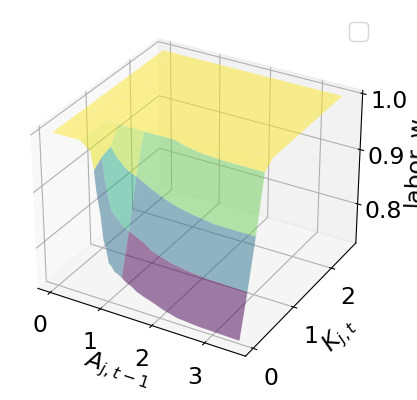

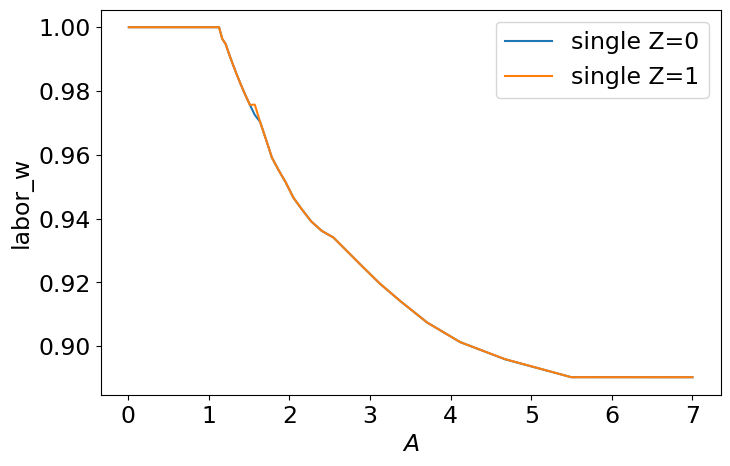

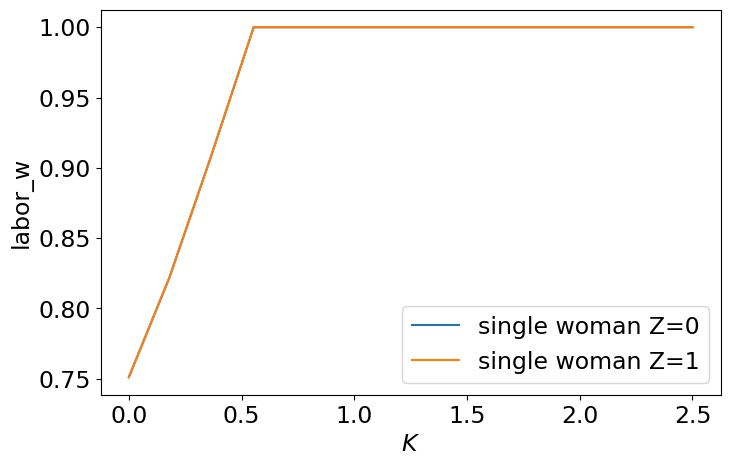

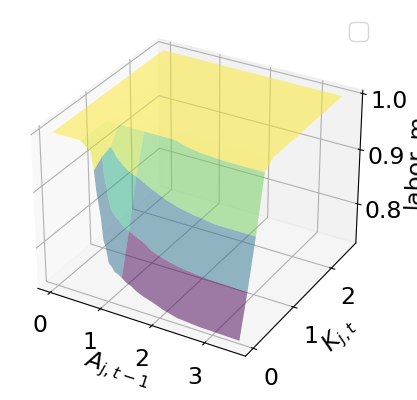

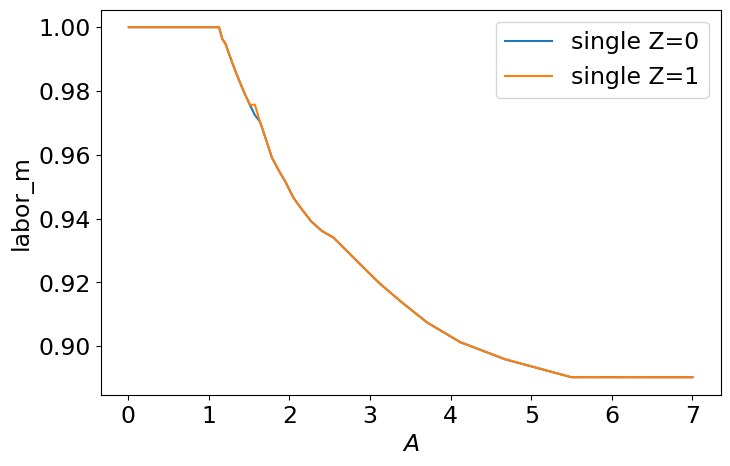

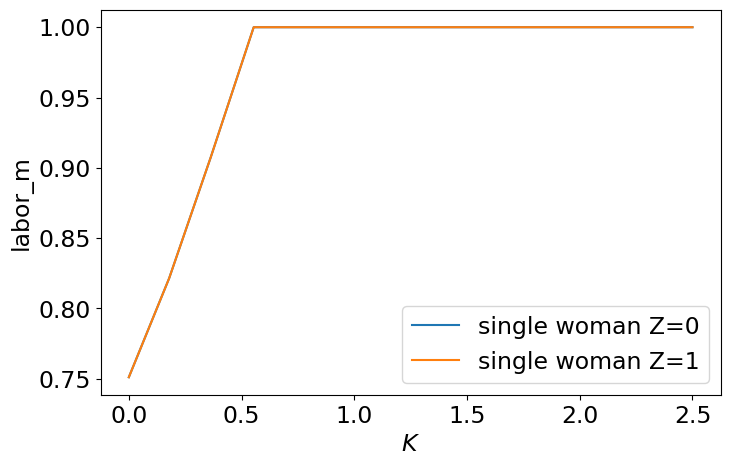

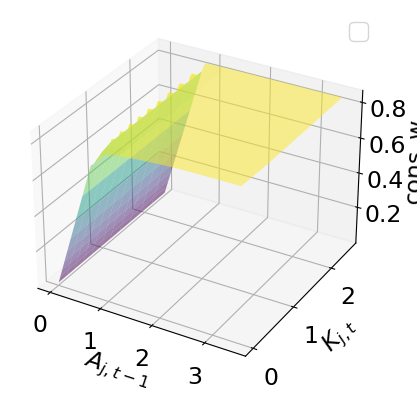

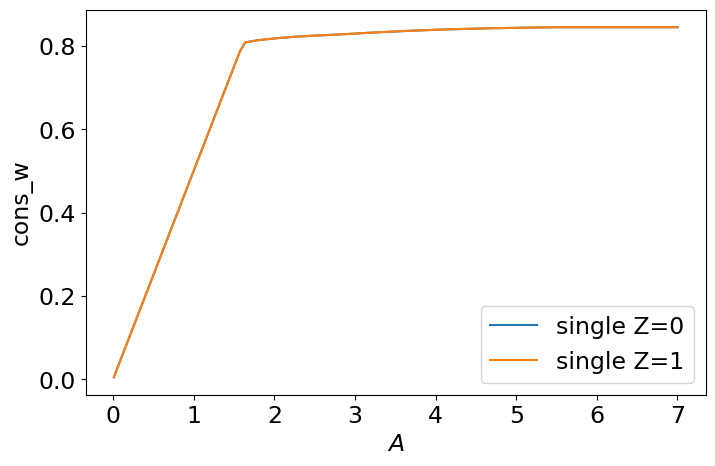

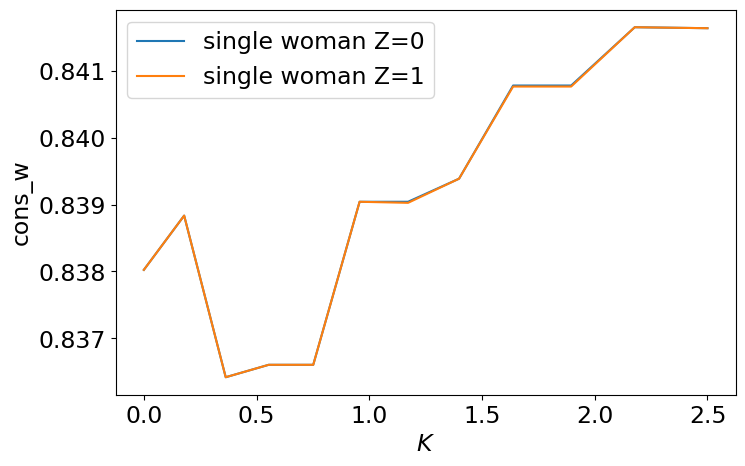

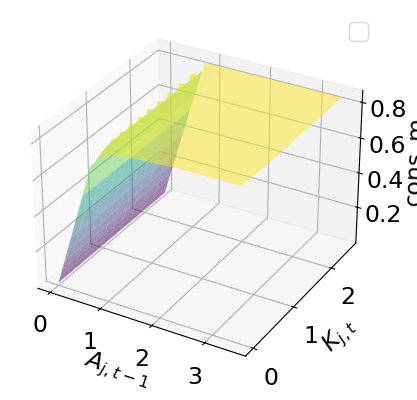

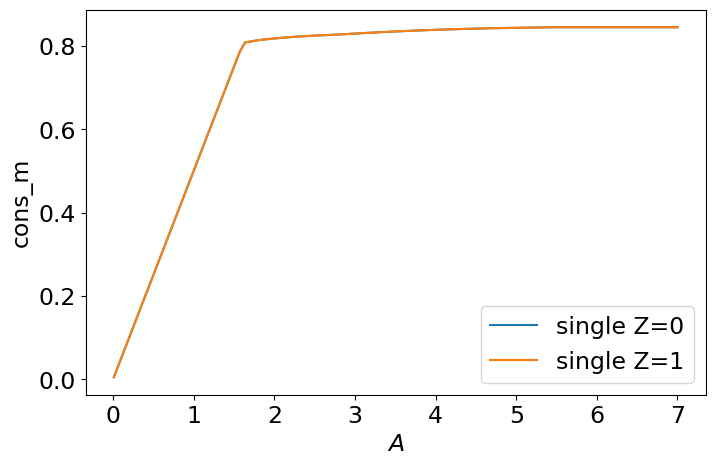

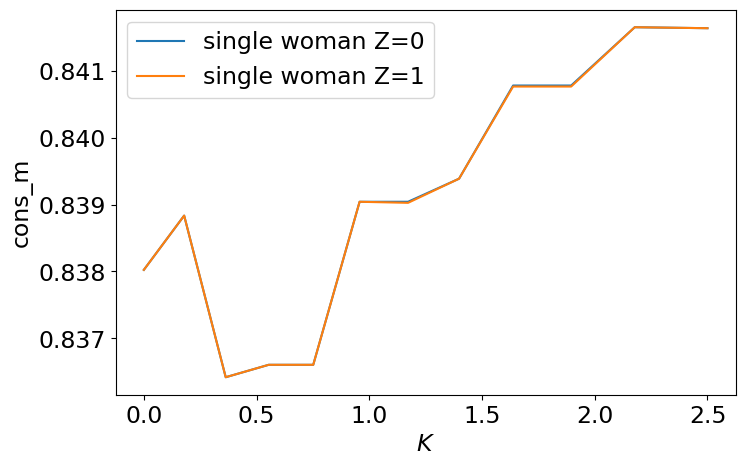

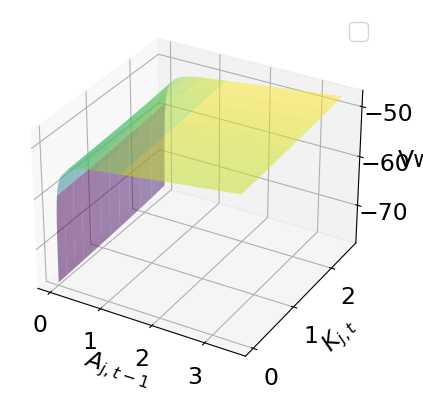

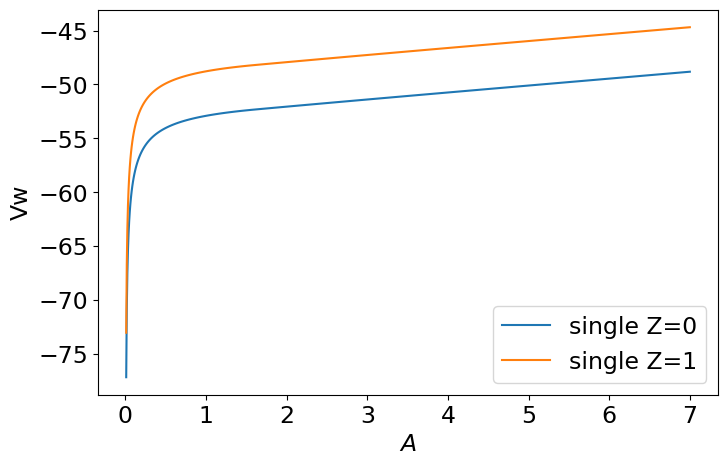

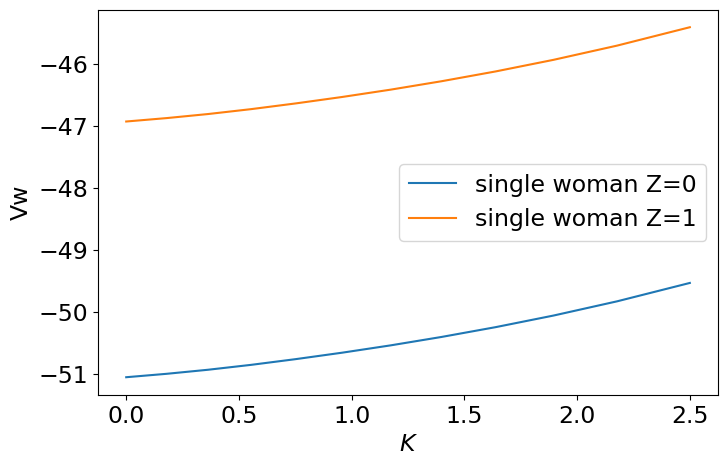

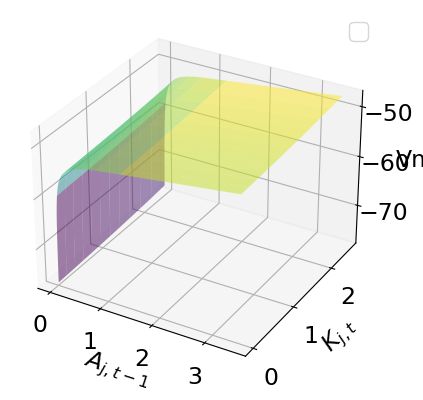

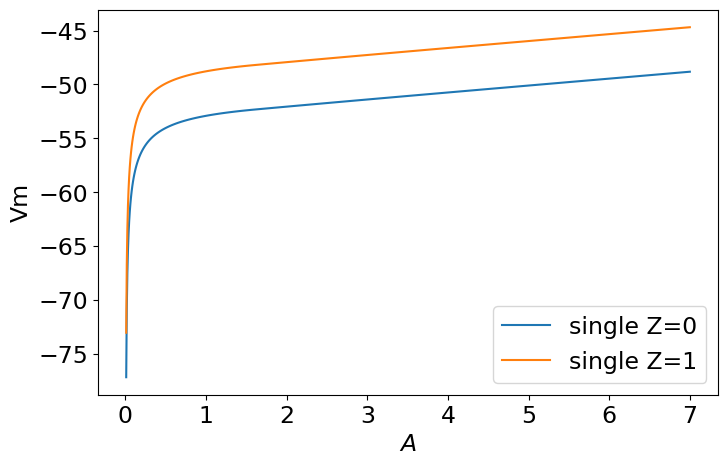

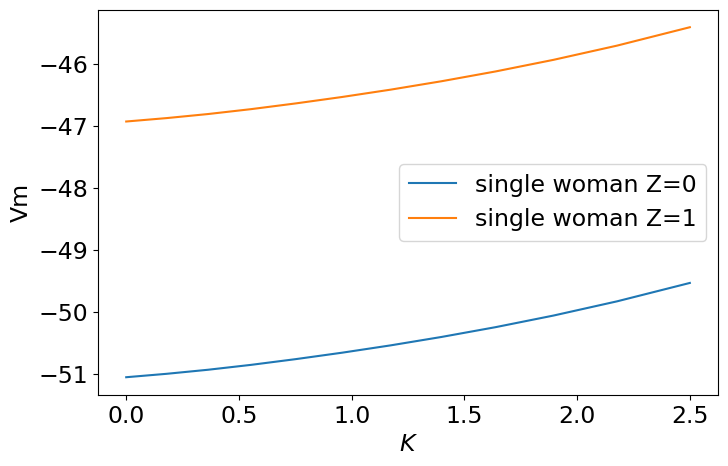

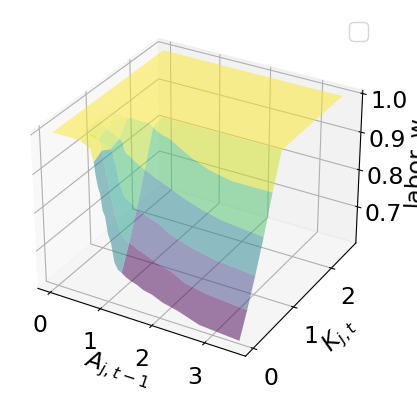

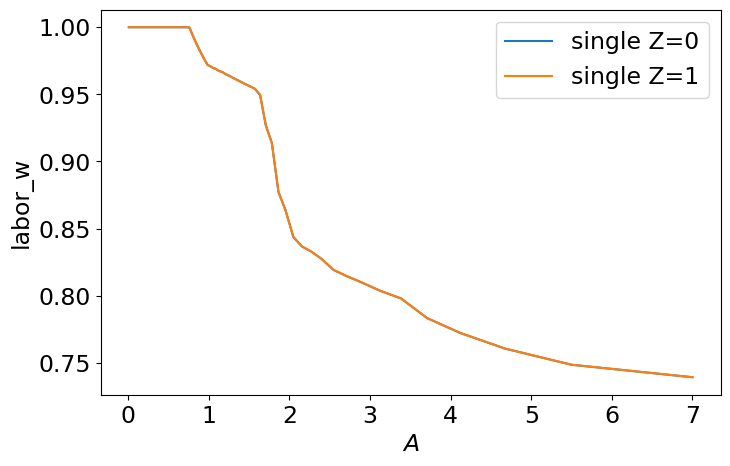

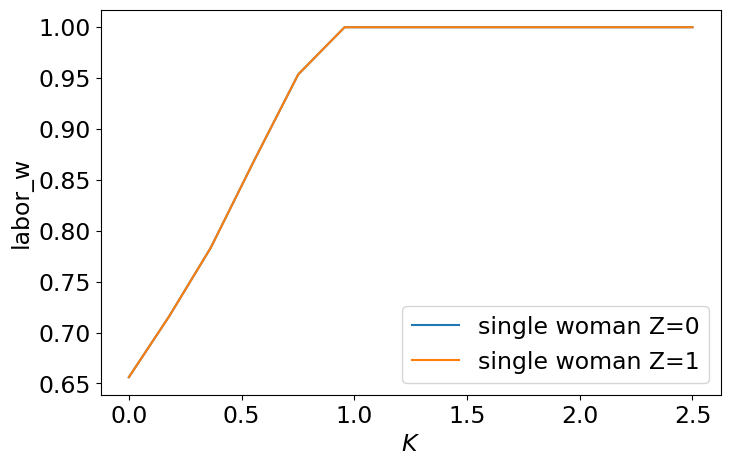

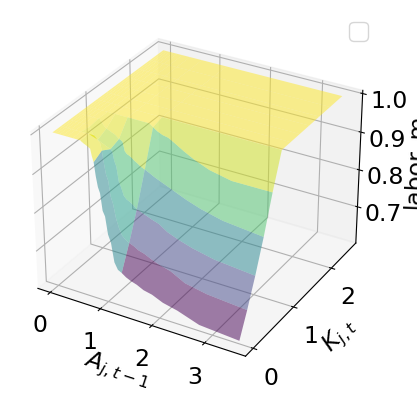

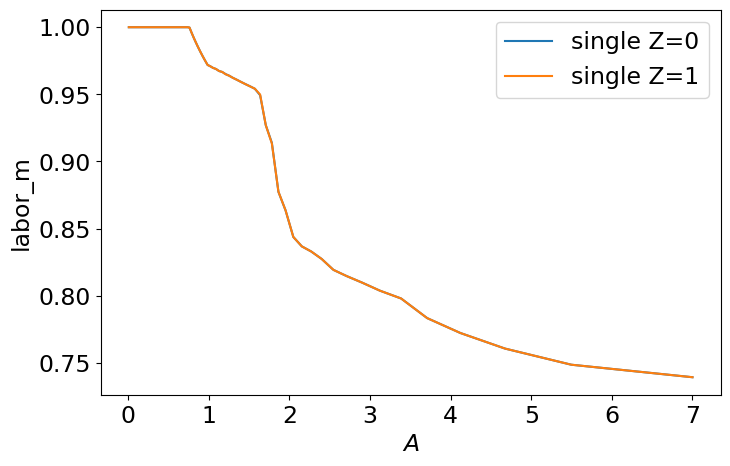

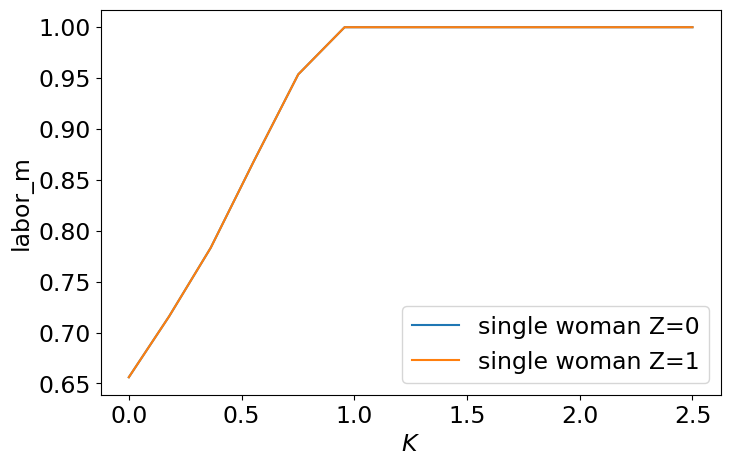

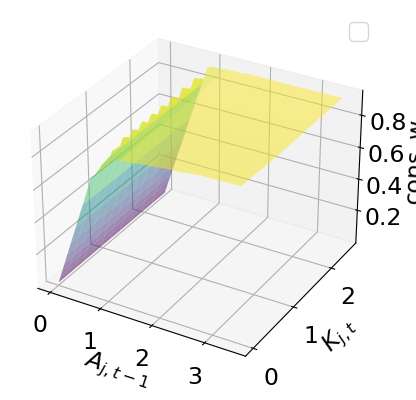

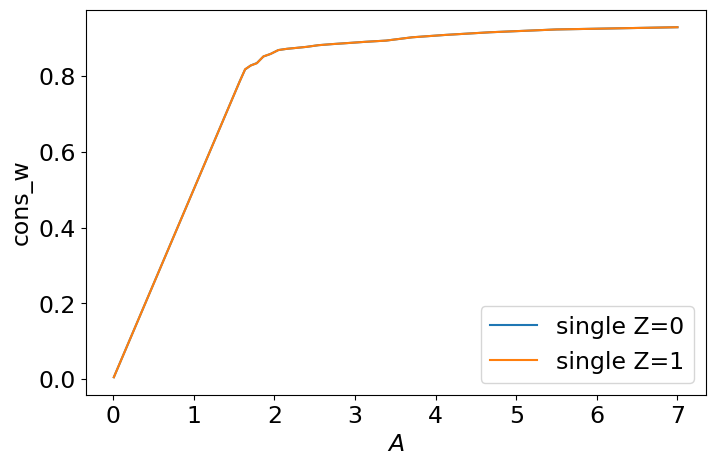

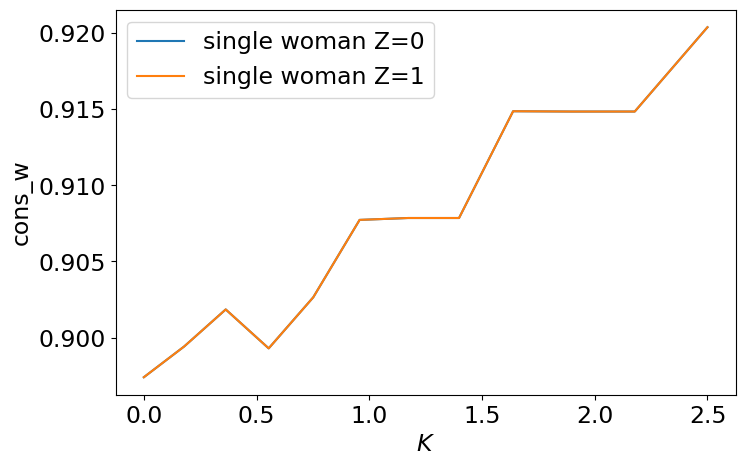

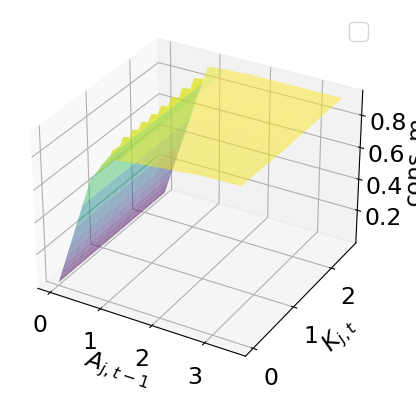

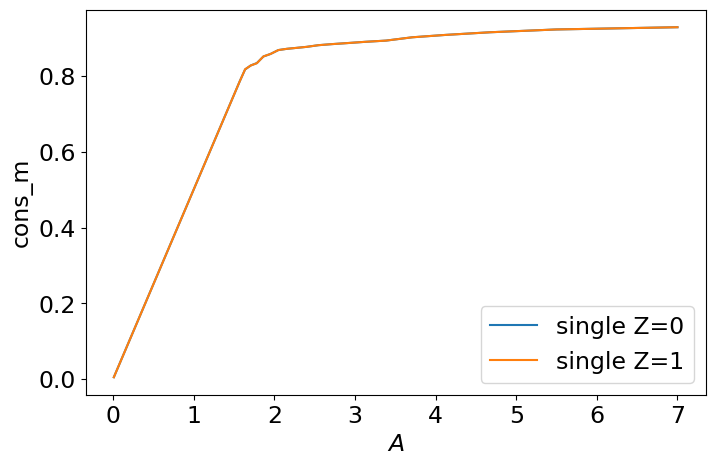

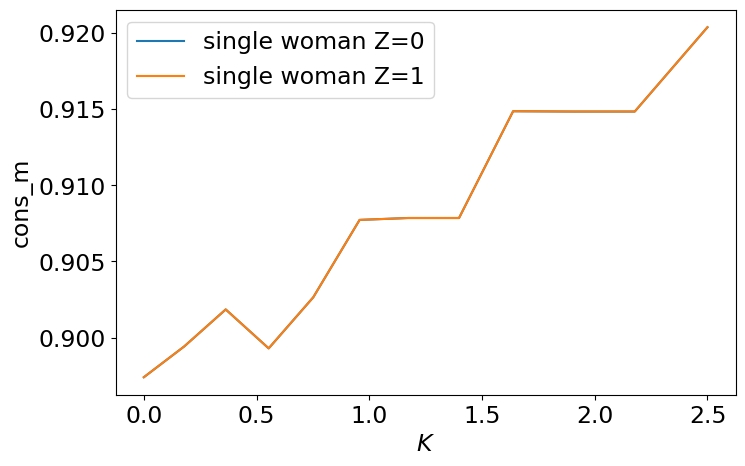

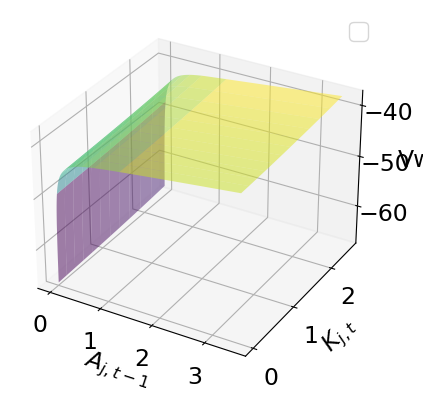

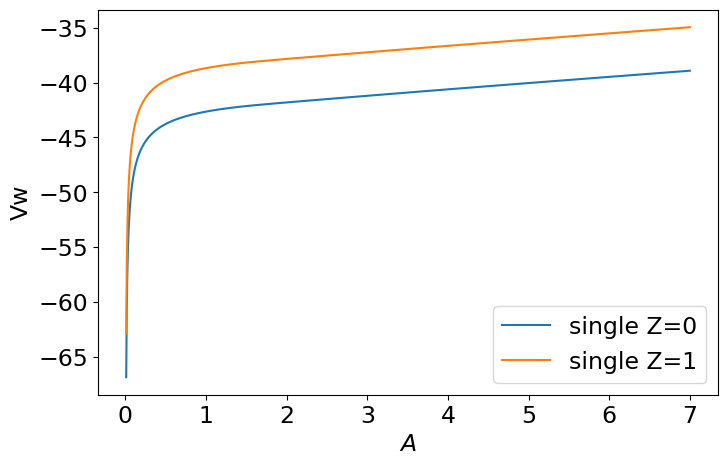

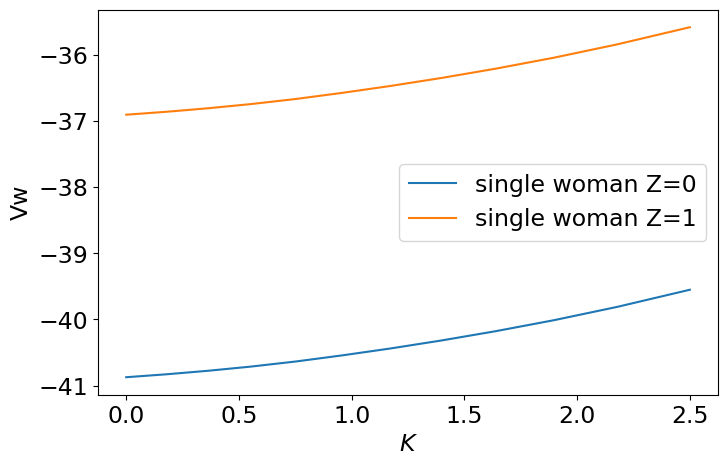

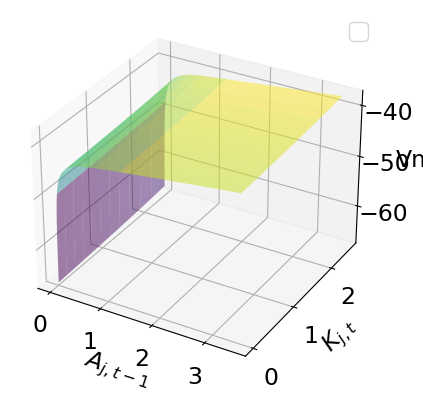

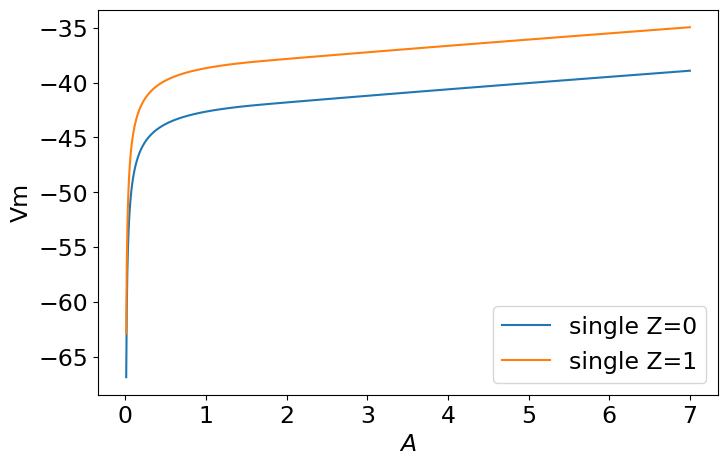

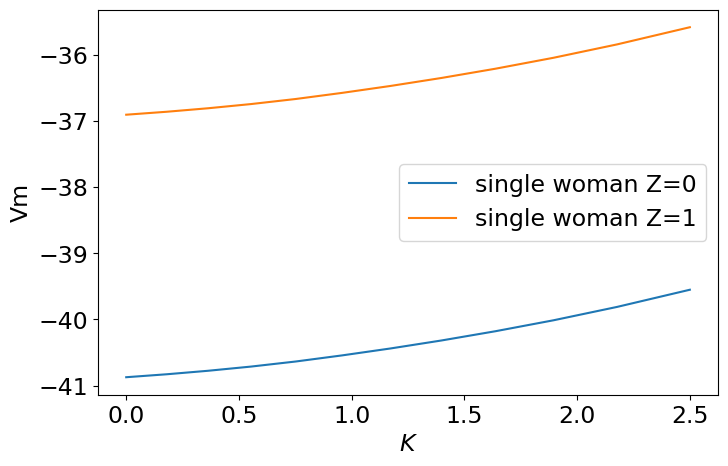

In [ ]:
#SINGLE TEST
i_A = 95
i_Z = 0
i_HK = 2
t = -5
#i_A = 1


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])







alpha = 0.5 


cmaps = ('viridis','gray')

var_list = ('labor_w', 'labor_m', 'cons_w', 'cons_m', 'Vw', 'Vm')
cmaps = ('viridis','gray')
for model_type in ('model_NC',):
    for t in (1,8):
        for var in var_list:
            
            
                    
            sol = models[model_type].sol
            par = models[model_type].par

            var_now = f'{var}_single'

            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_Aw, par.grid_K,indexing='ij')                   
            Z = getattr(model.sol,var_now)[t,0]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$A_{j,t-1}$',ylabel='$K_{j,t}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_single_{var}_gridA_gridK_t{t}.png')


            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,:,i_HK]
            Z2 = getattr(model.sol,var_now)[t,1,:,i_HK]
            ax.plot(par.grid_A,Z1, label = 'single Z=0')
            ax.plot(par.grid_A,Z2, label = 'single Z=1')                    
            ax.set_xlabel(f"$A$")
            ax.set_ylabel(var)
            plt.legend()            
            plt.savefig(f'output/{model_type}_single_{var}_gridA_t{t}.png')

            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,i_A,:]
            Z2 = getattr(model.sol,var_now)[t,1,i_A,:]
            ax.plot(par.grid_K,Z1, label = 'single woman Z=0')
            ax.plot(par.grid_K,Z2, label = 'single woman Z=1')                 
            ax.set_xlabel(f"$K$")
            ax.set_ylabel(var)
            plt.legend()            
            plt.savefig(f'output/{model_type}_single_{var}_gridK_t{t}.png')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-50.99922268 -50.99922268 -50.99922268 -50.99922268 -50.99922268
 -50.99922268 -50.99922268 -50.99922268 -50.99922268 -50.99922268
 -50.99922268 -50.99922268 -50.99922268 -50.99922268 -50.99922268
 -50.99922268 -50.99922268 -50.99922268 -50.97375759 -50.76591135
 -50.43166302 -50.00373968 -49.48802421 -48.85267522 -48.09114788
 -47.22809166 -46.28831067 -45.29079063 -44.25122991 -43.181893
 -42.09254611 -40.99085422 -39.8815528  -38.76714703 -37.65039948
 -36.53113278 -35.41045778 -34.28950219 -33.16807903 -32.04630026
 -30.92394423]
[-51.91326057 -51.86326057 -51.81326057 -51.76326057 -51.71326057
 -51.66326057 -51.61326057 -51.56326057 -51.51326057 -51.46326057
 -51.41326057 -51.36326057 -51.31326057 -51.26326057 -51.21326057
 -51.16326056 -51.11325225 -51.0604222  -50.97375759 -50.76591135
 -50.43166302 -50.00373968 -49.48802421 -48.85267522 -48.09114788
 -47.22809166 -46.28831067 -45.29079063 -44.25122991 -43.181893
 -42.09254611 -40.99085422 -39.8815528  -38.76714703 -37.65039948

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

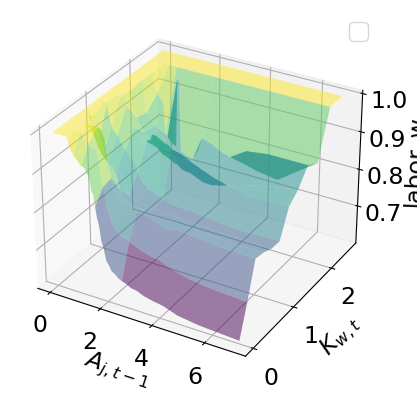

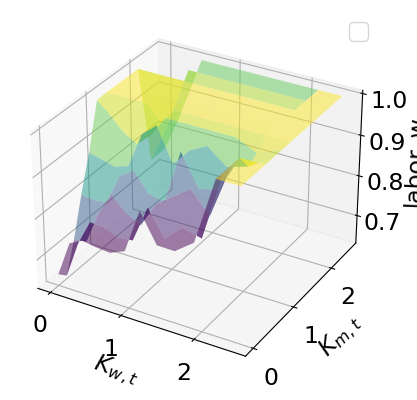

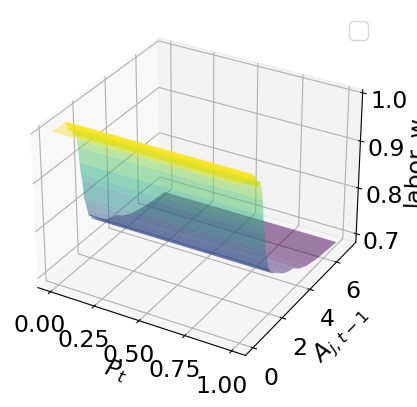

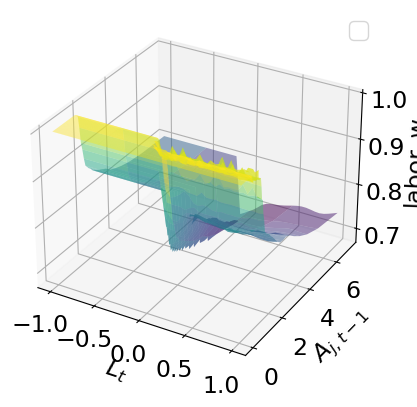

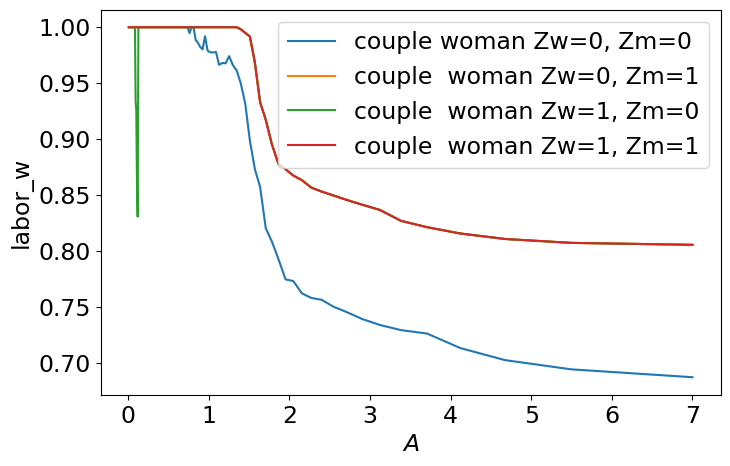

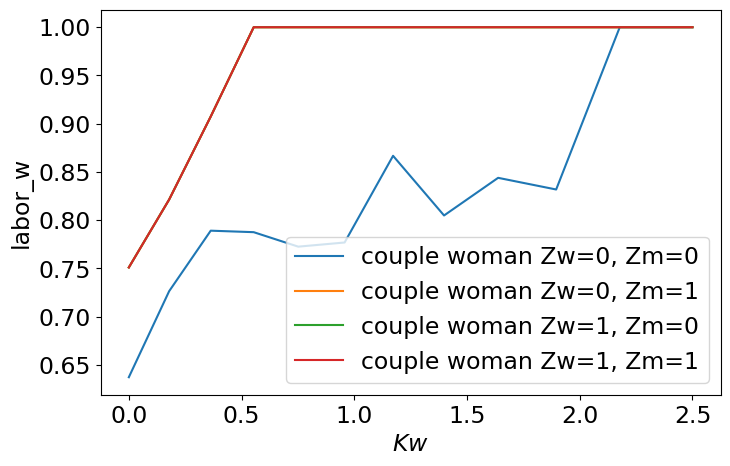

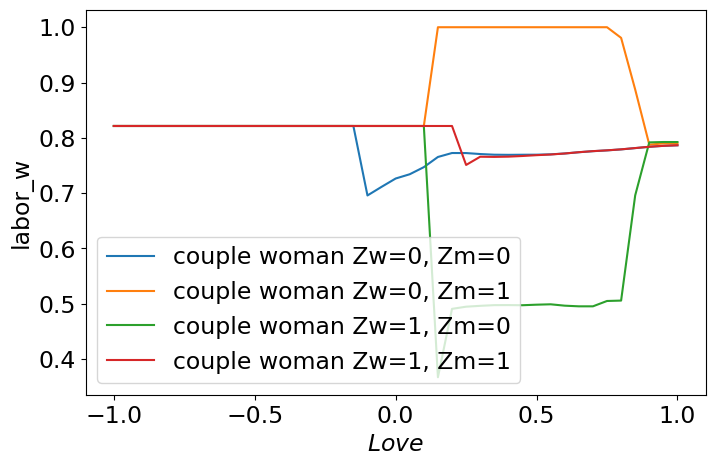

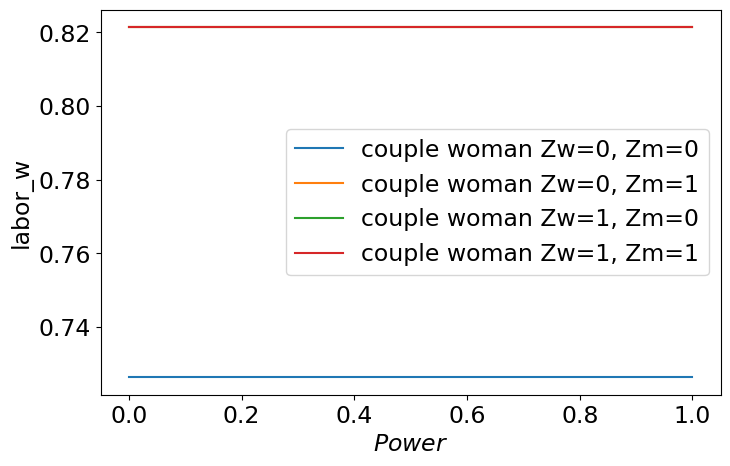

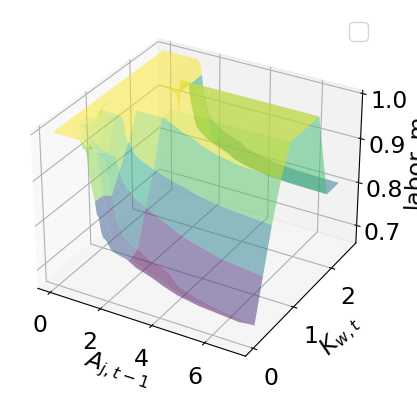

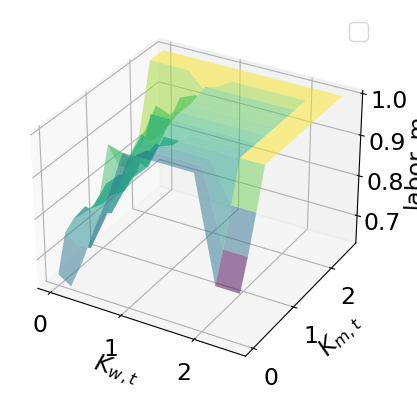

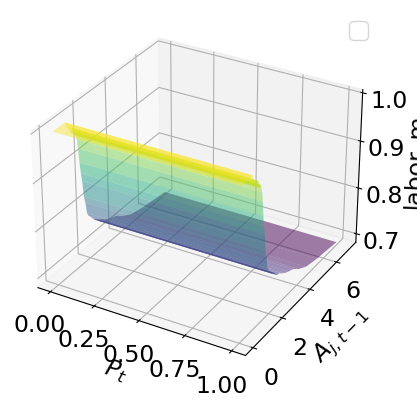

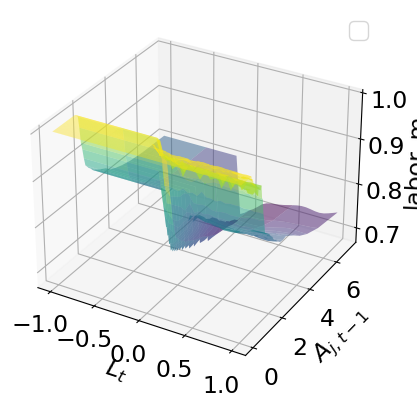

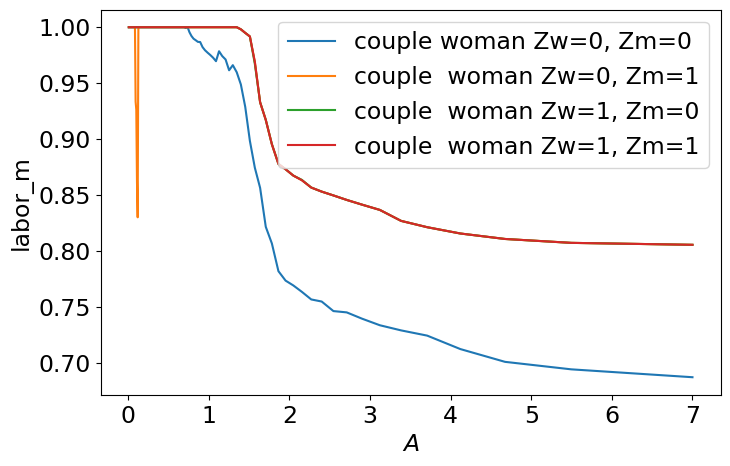

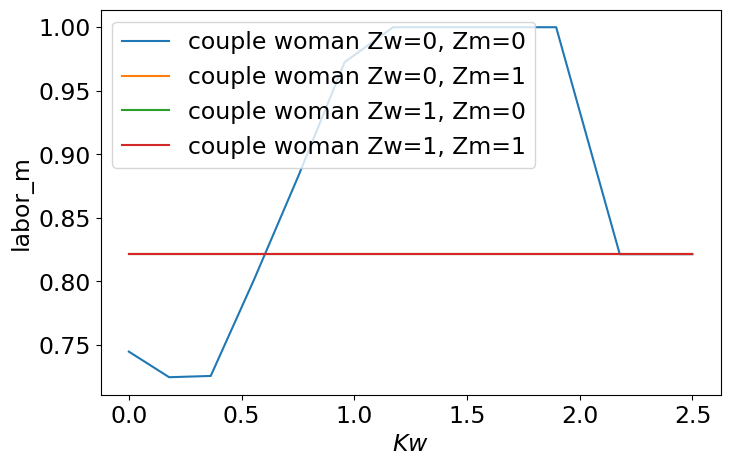

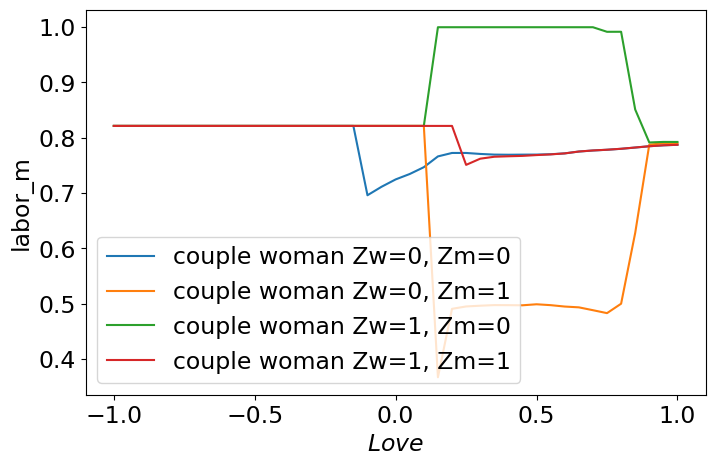

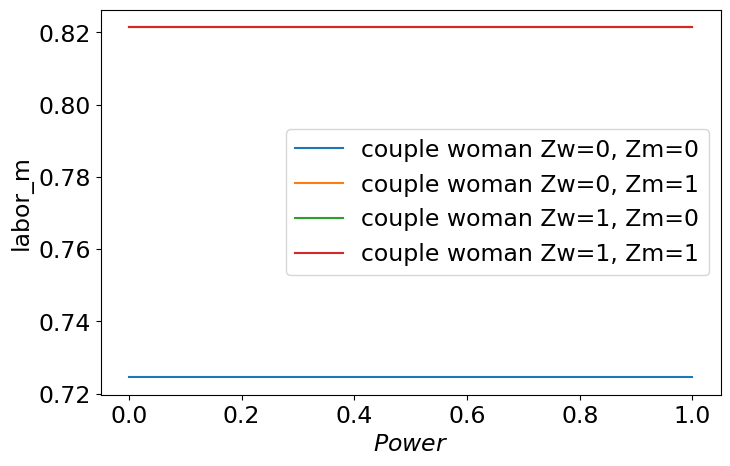

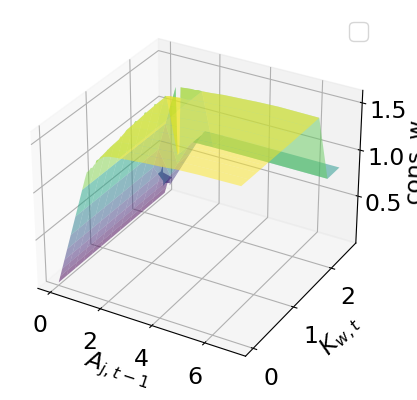

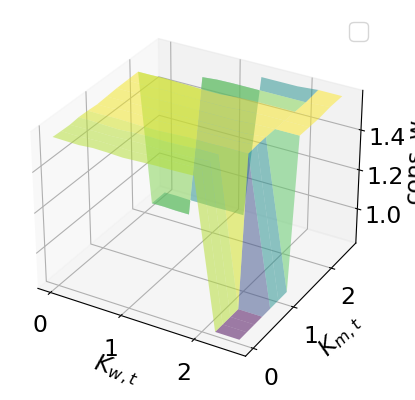

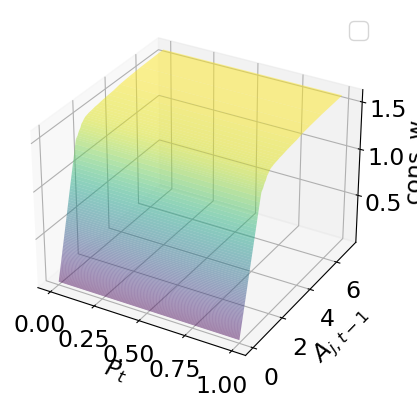

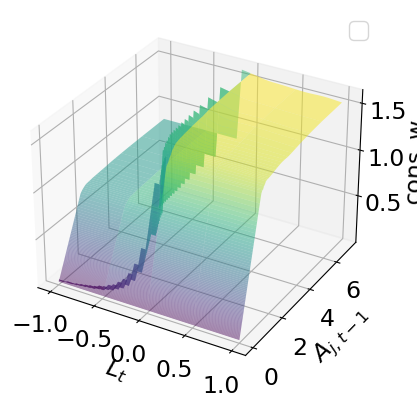

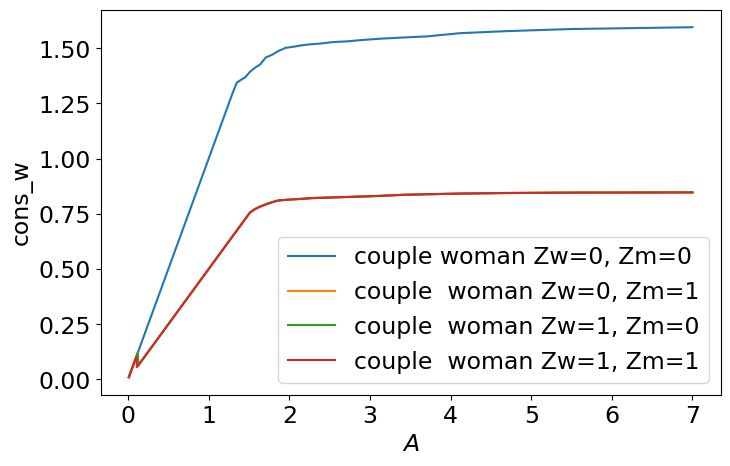

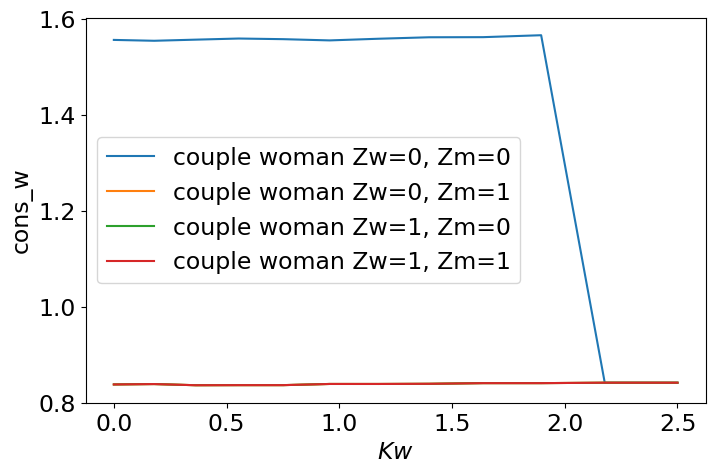

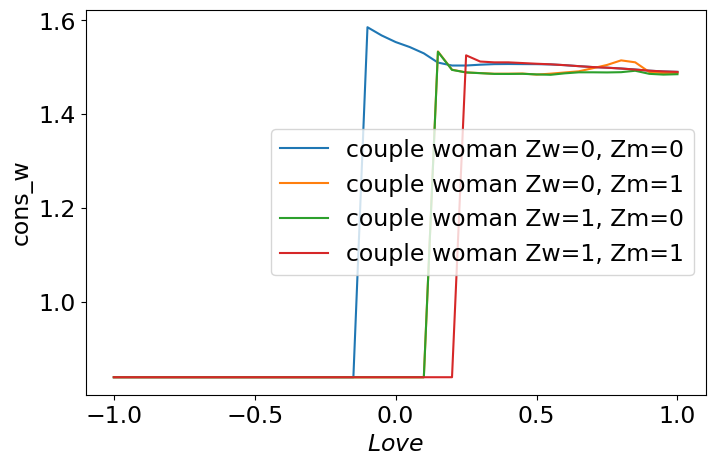

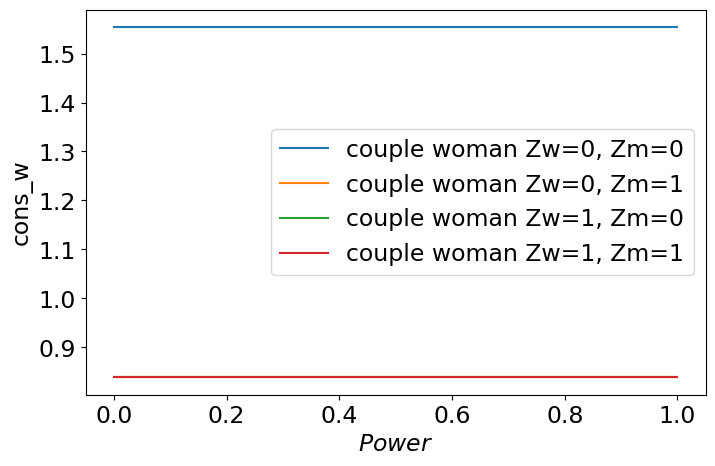

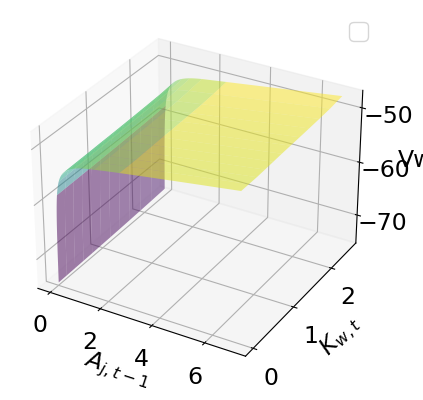

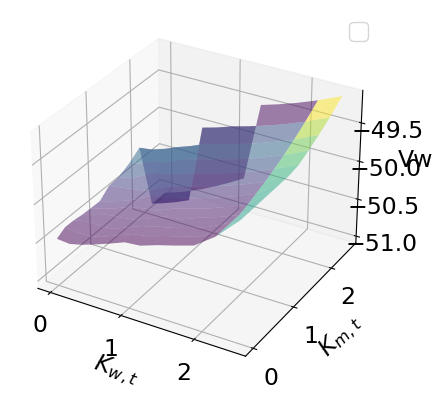

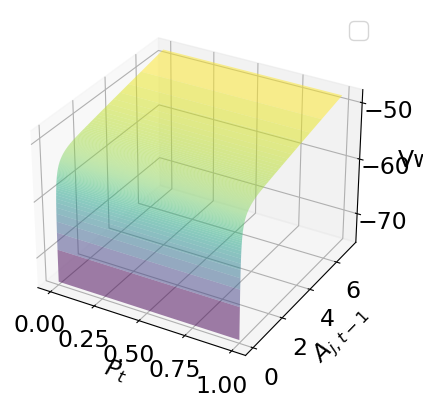

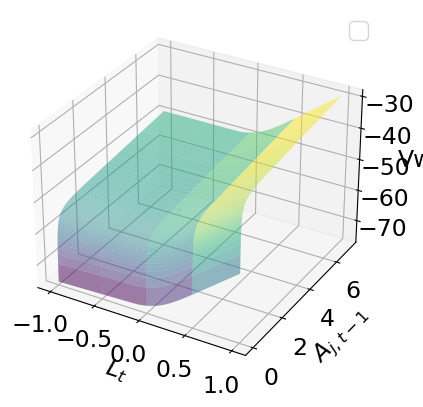

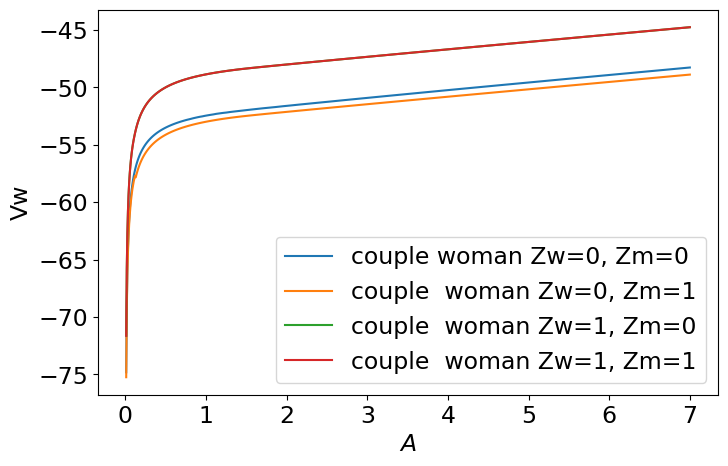

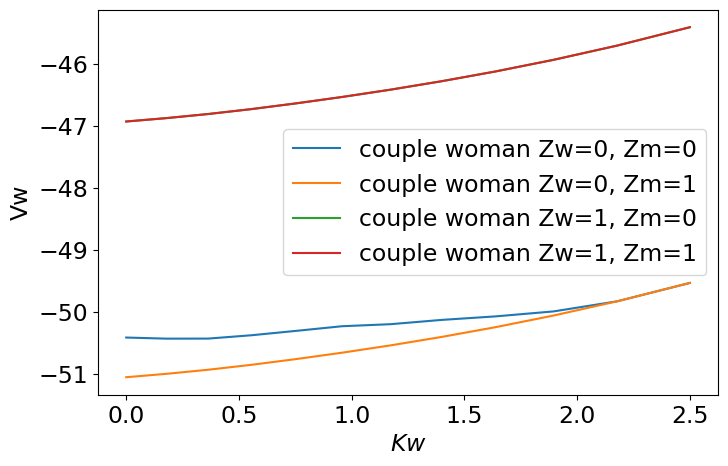

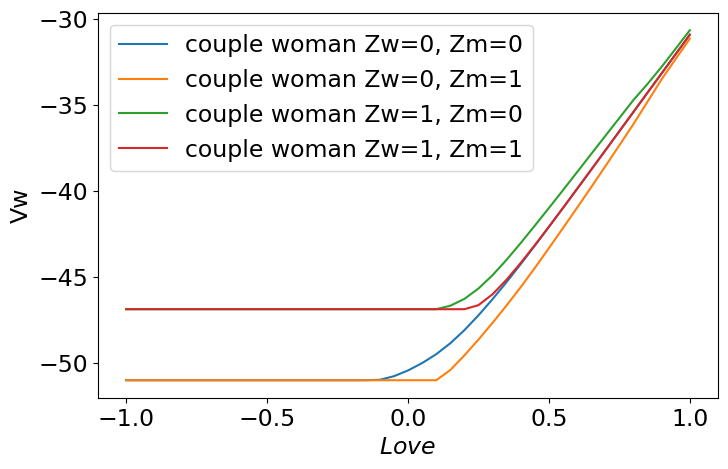

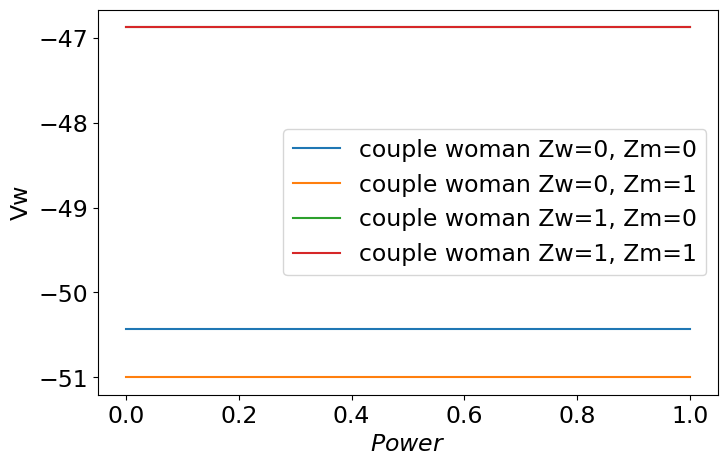

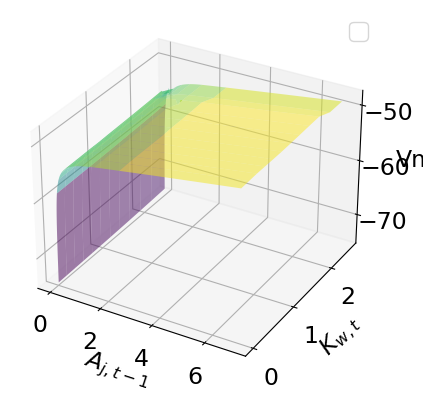

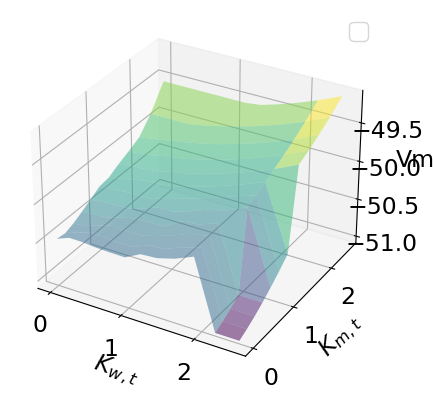

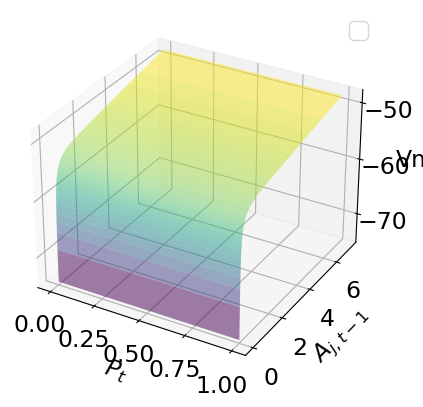

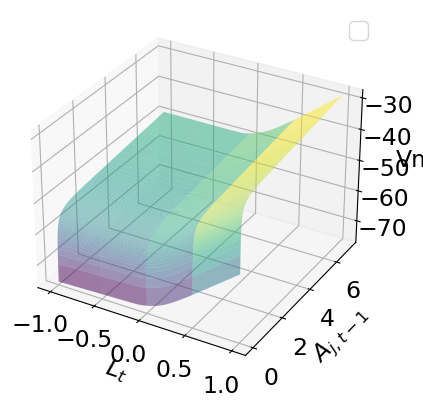

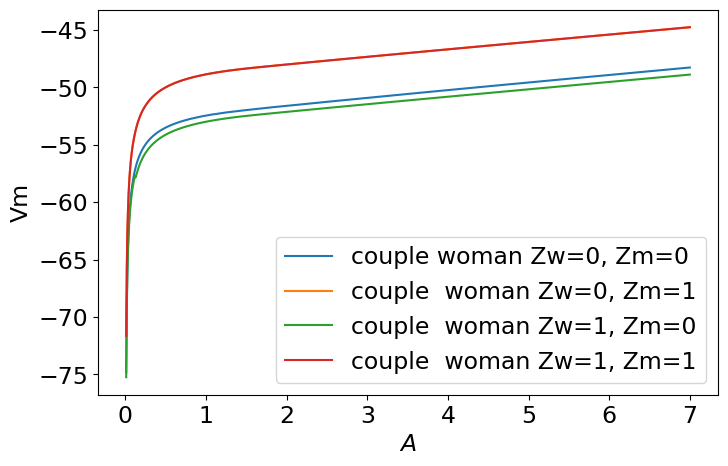

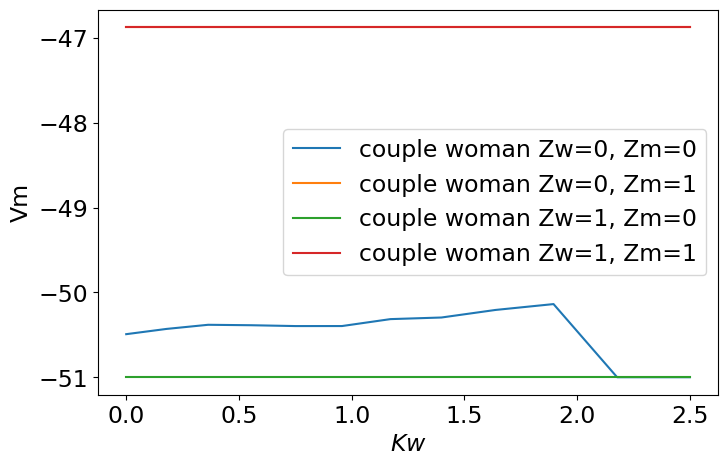

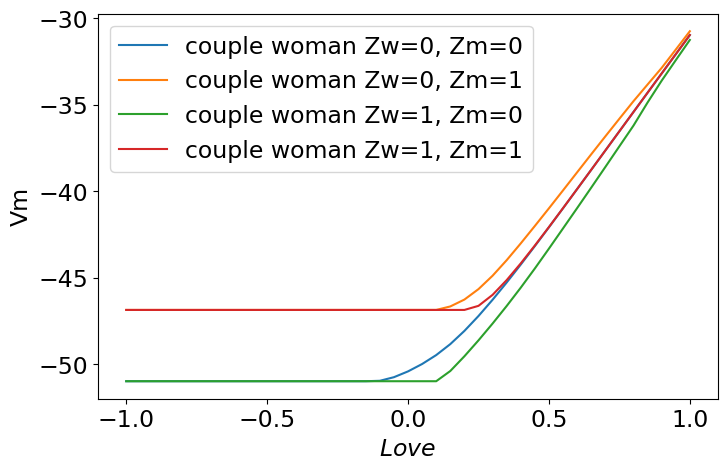

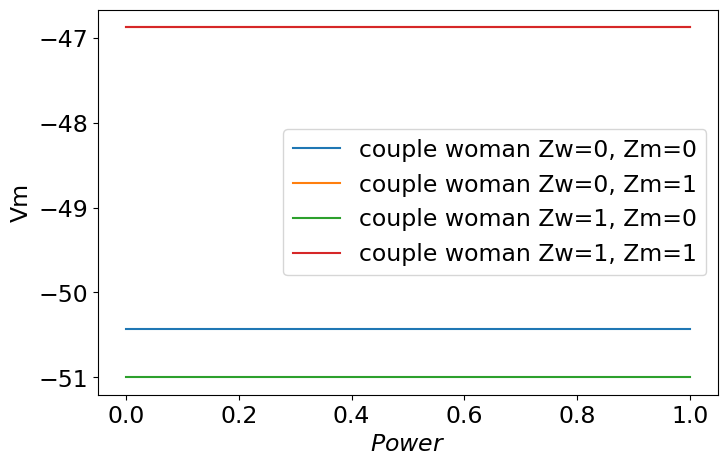

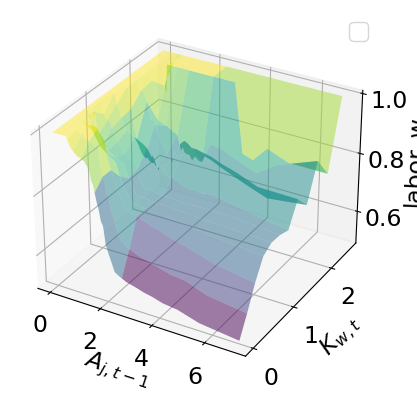

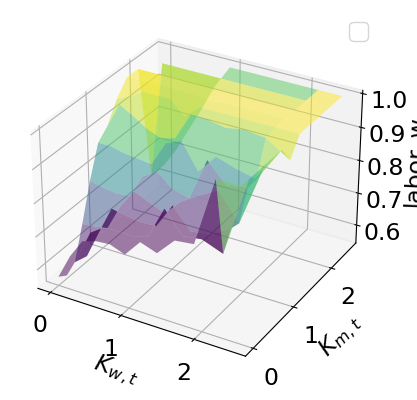

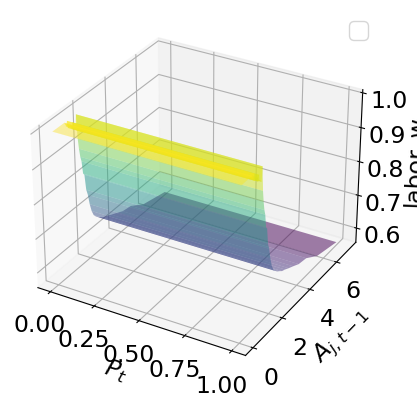

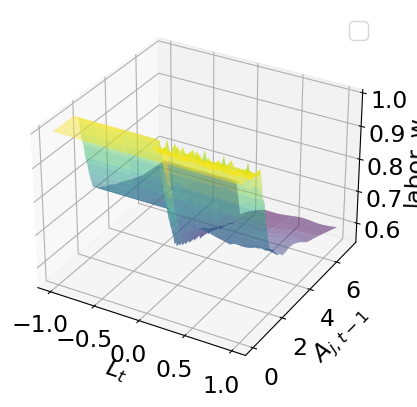

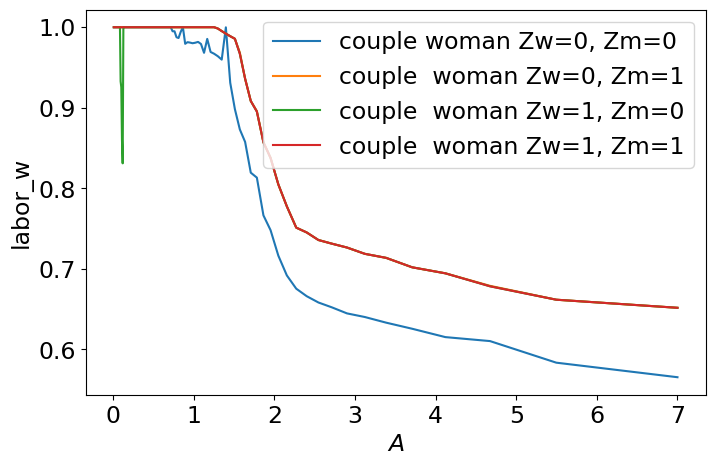

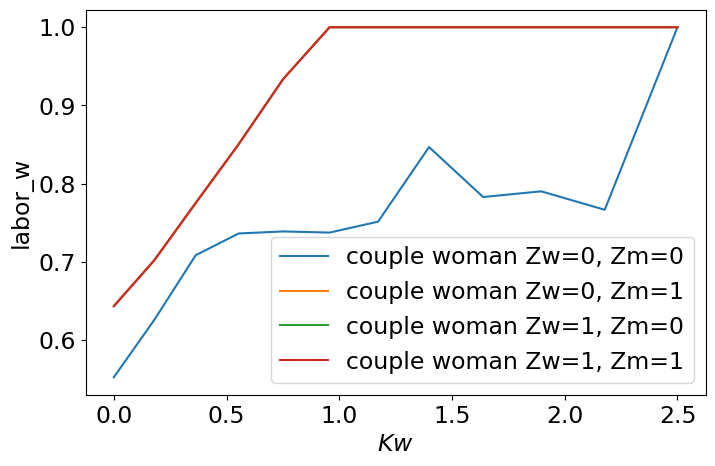

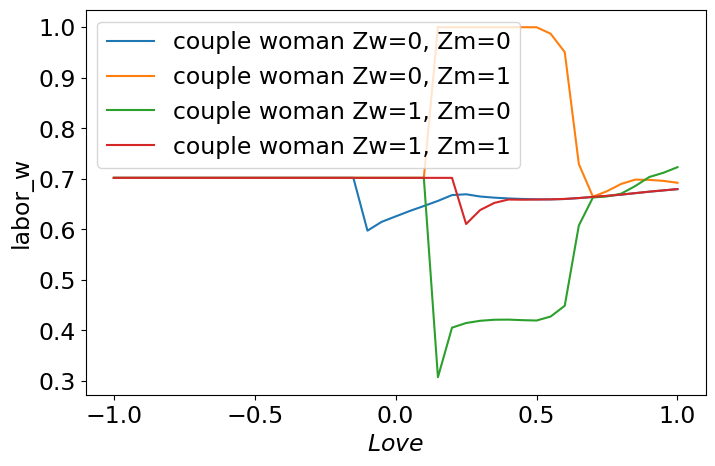

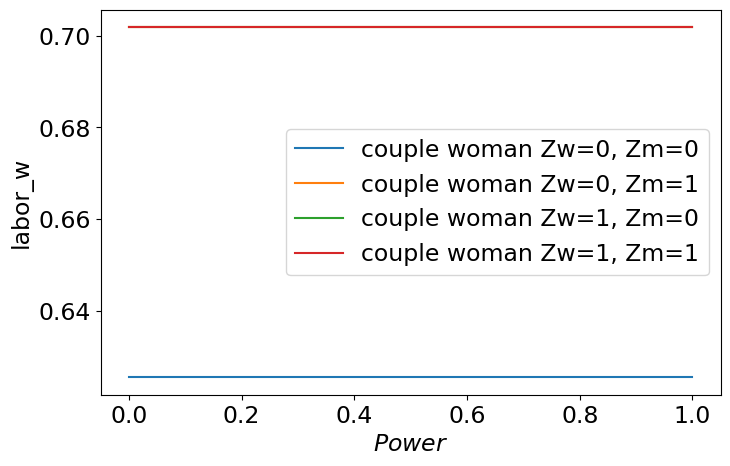

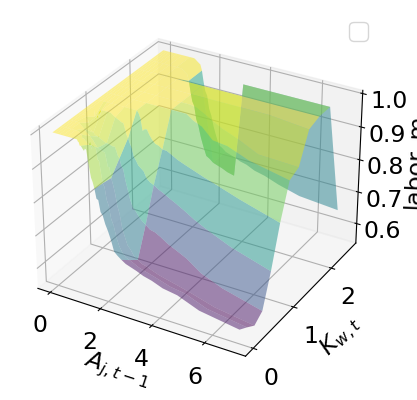

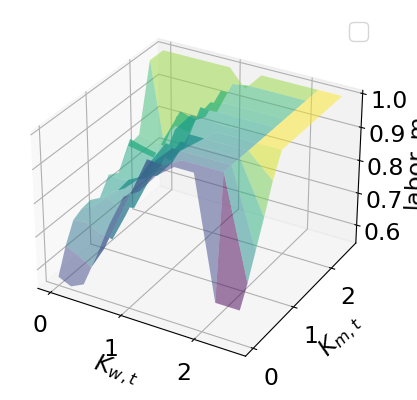

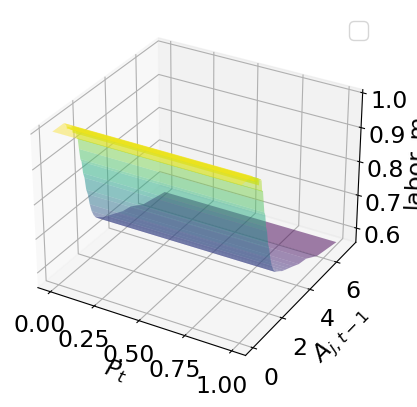

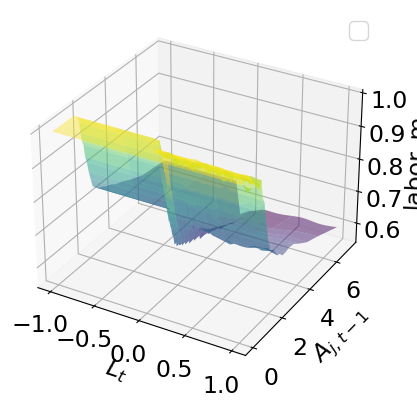

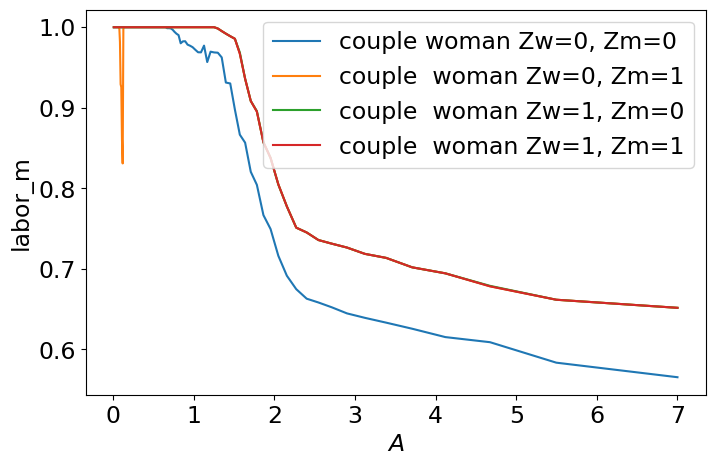

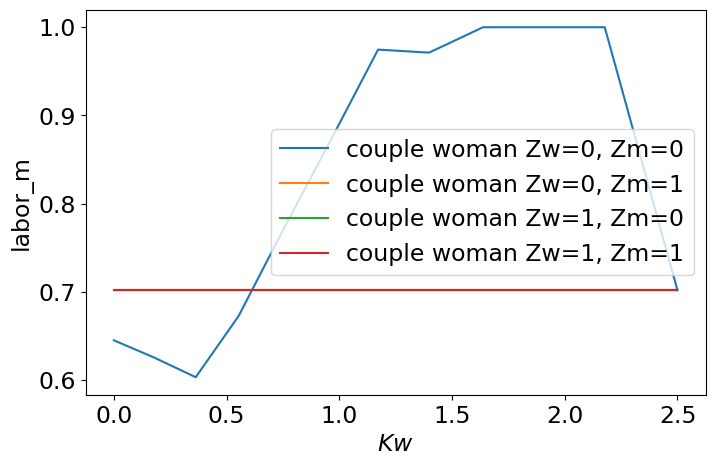

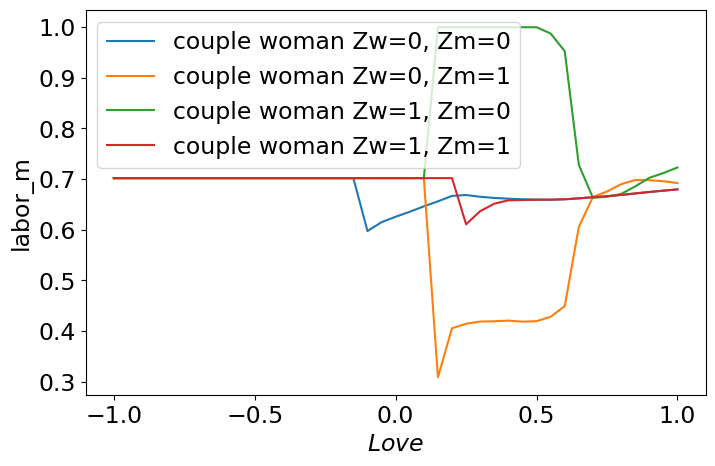

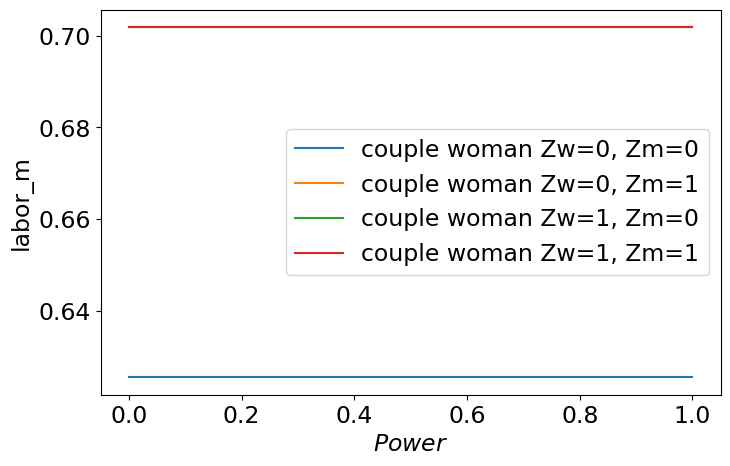

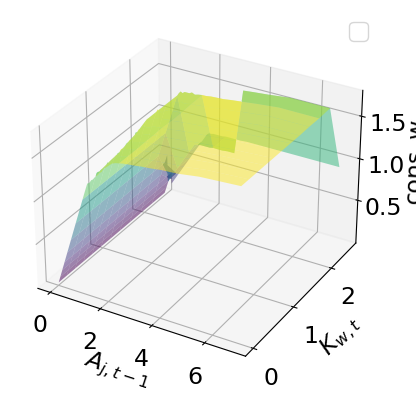

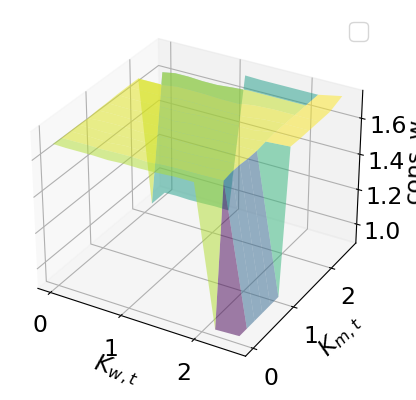

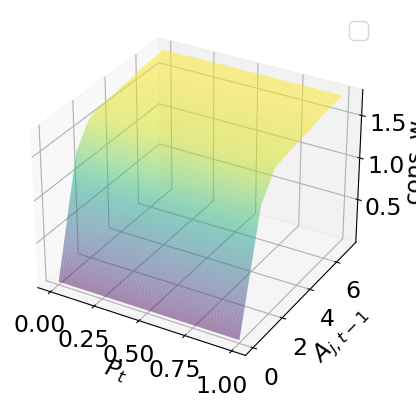

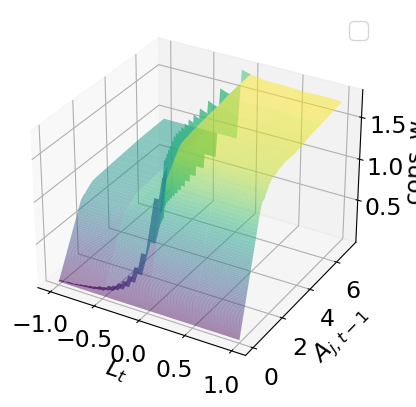

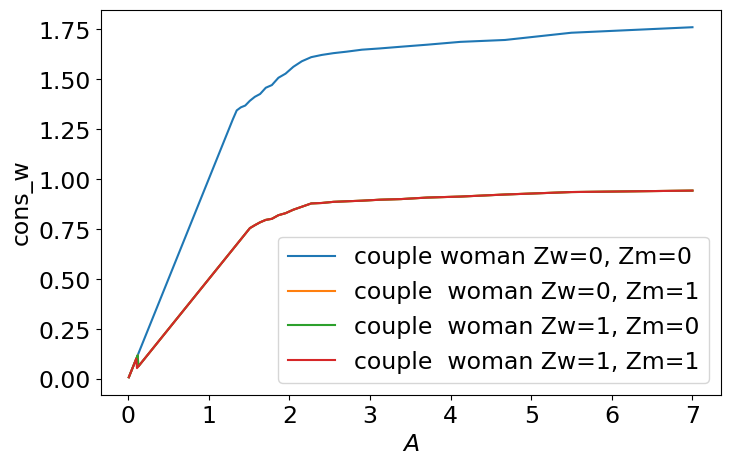

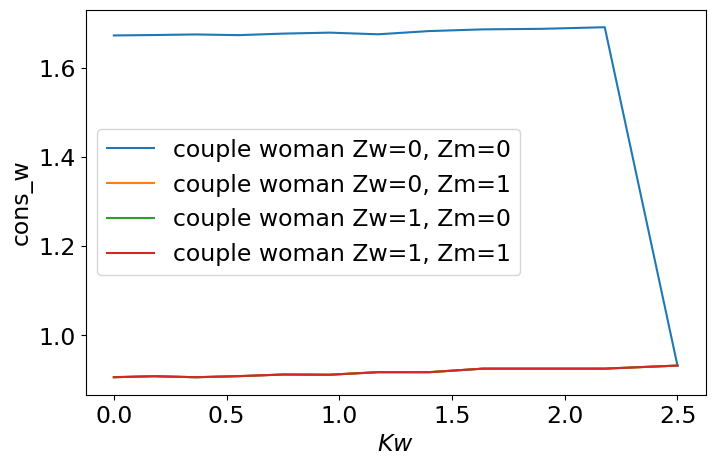

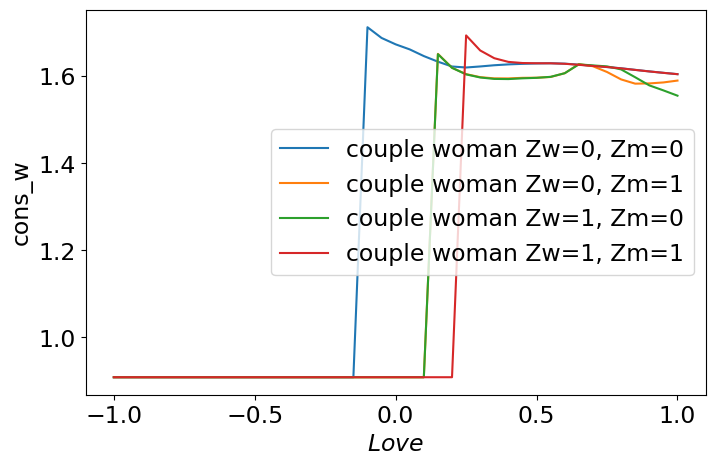

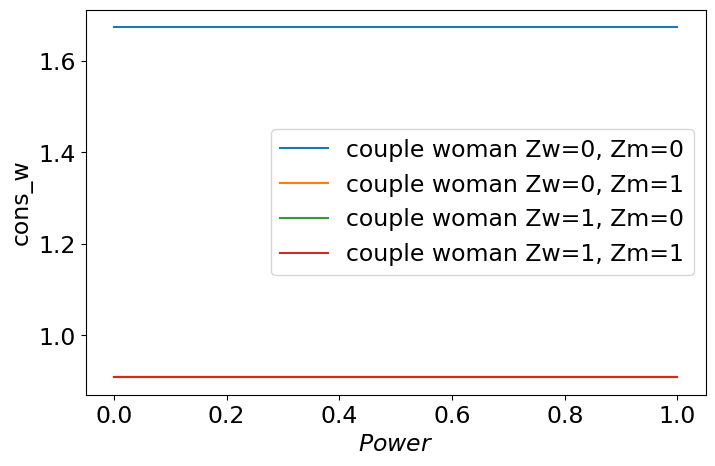

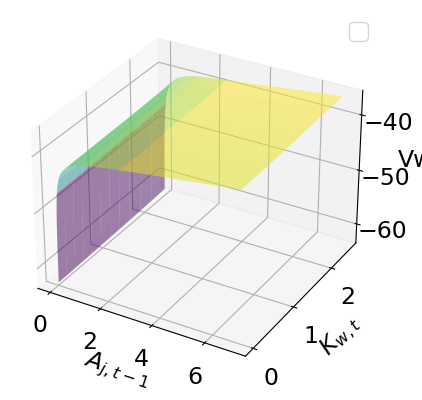

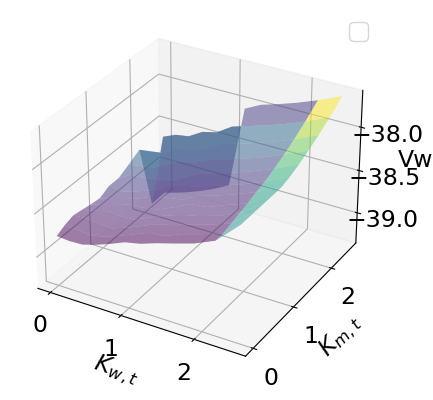

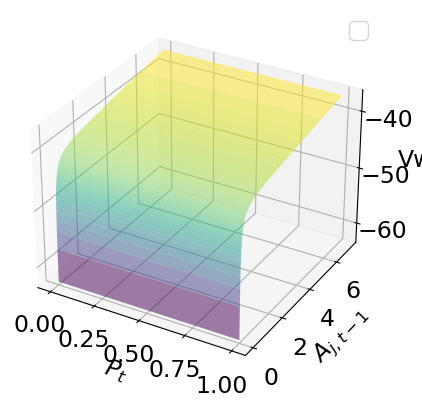

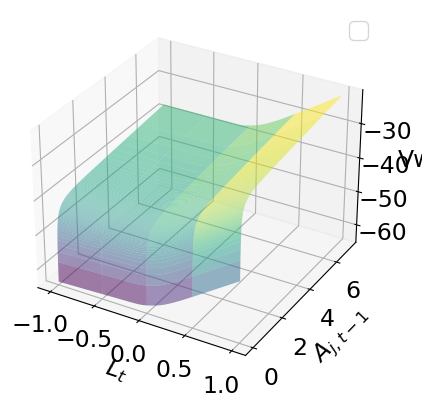

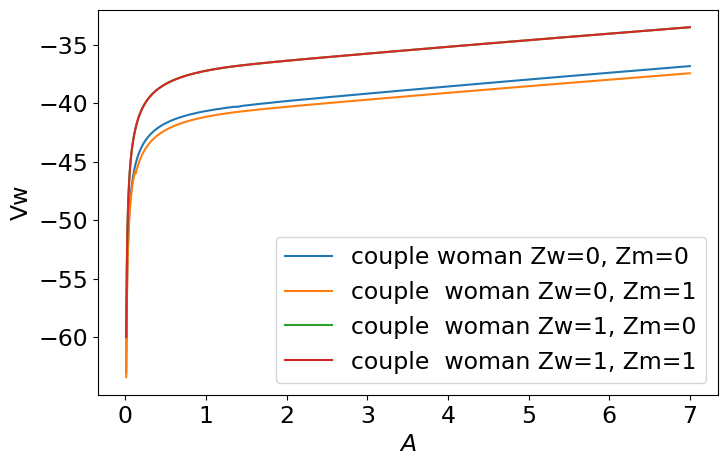

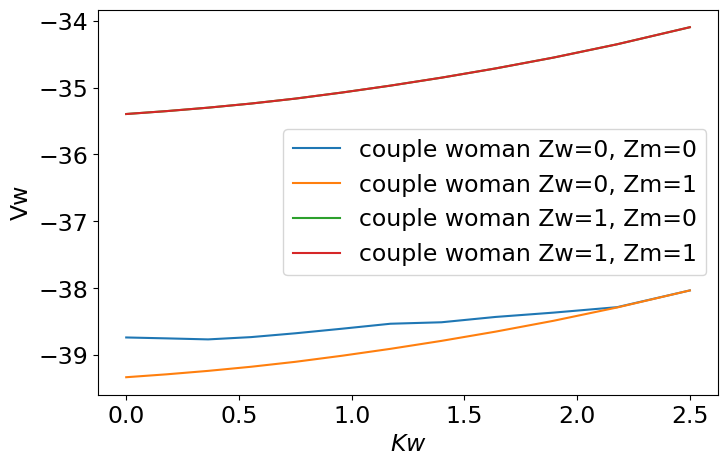

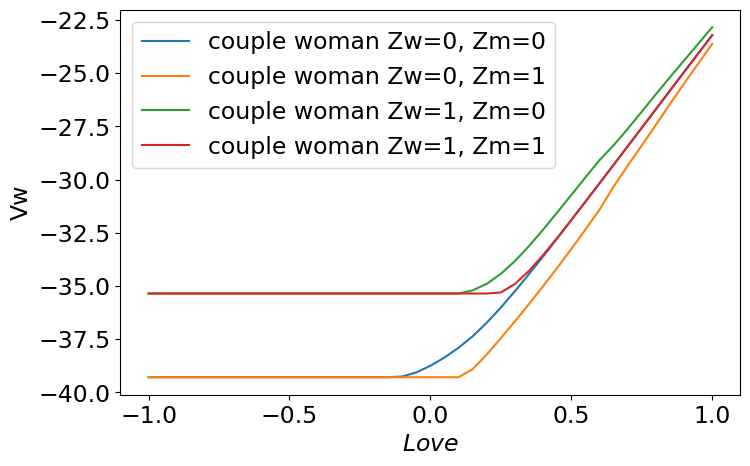

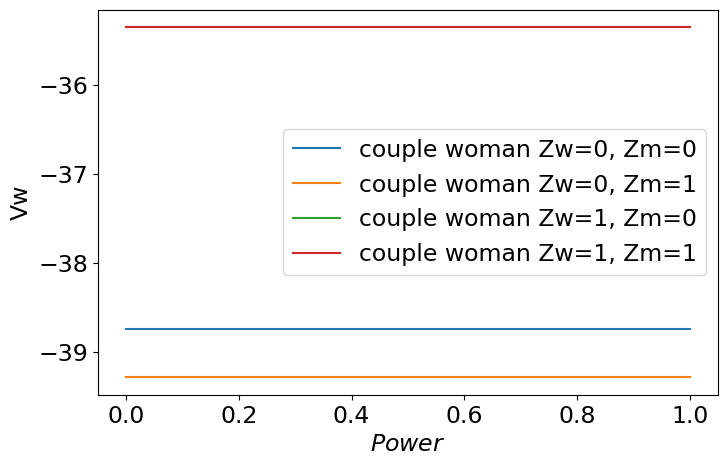

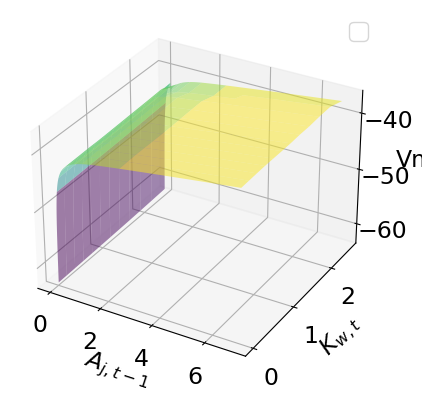

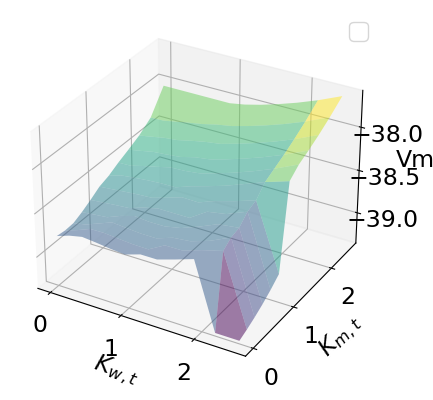

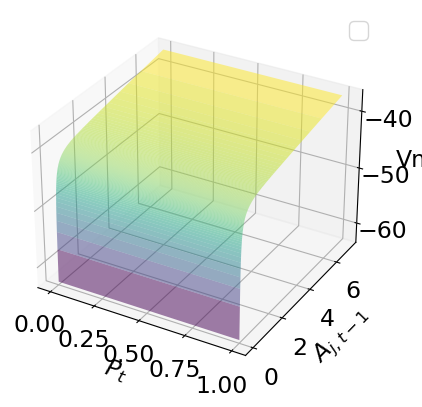

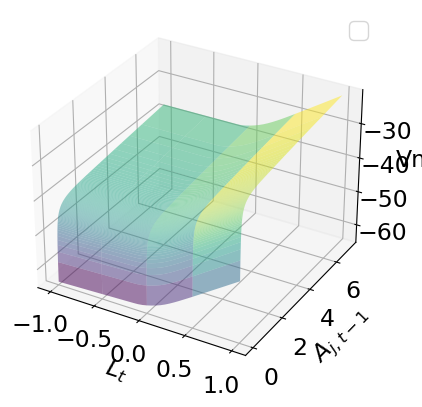

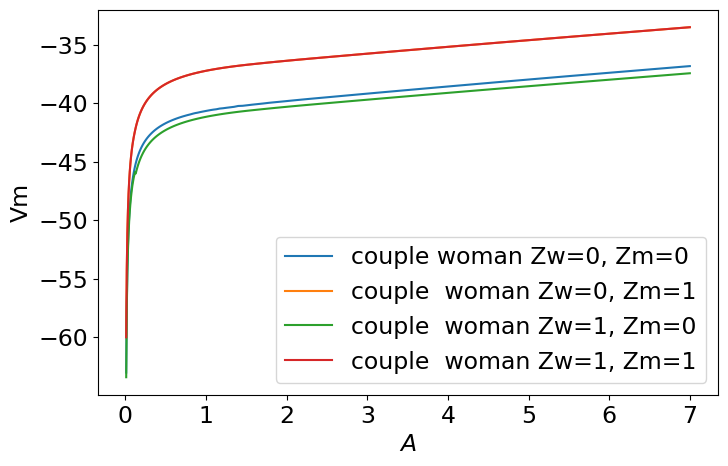

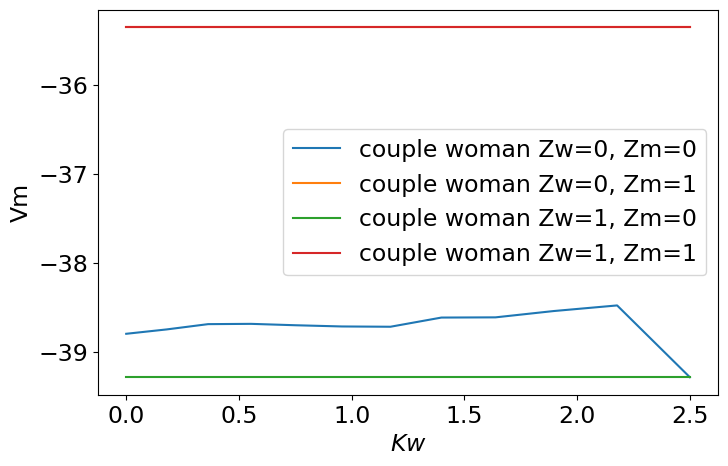

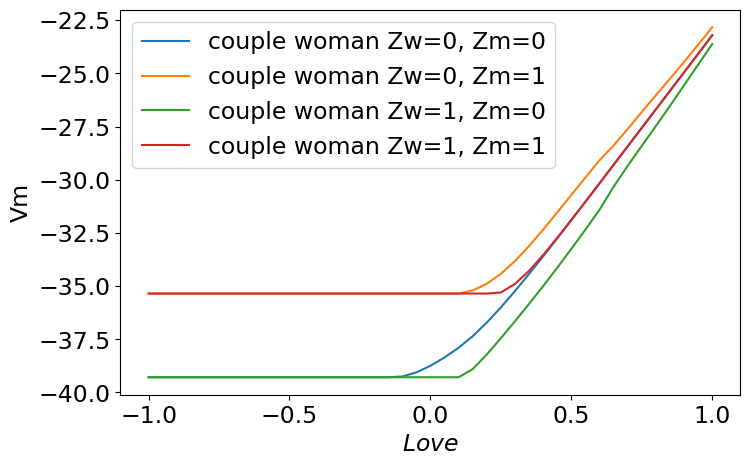

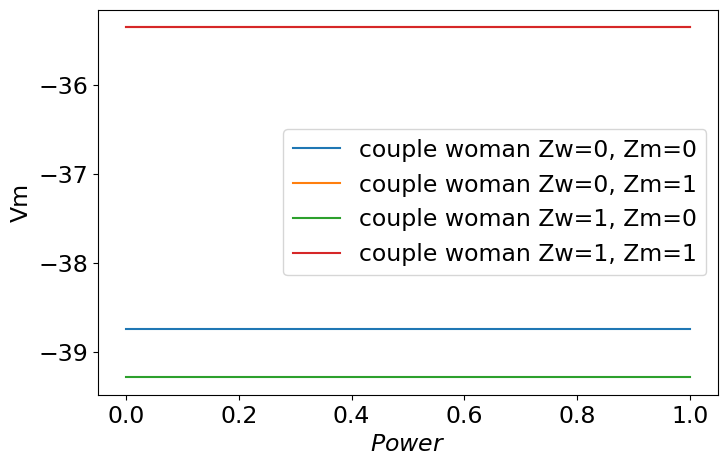

In [ ]:
#COUPLE TEST
i_P = 5
i_L = 20
i_A = 95
i_HKw = 1
i_HKm = 1
t = 1


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])



#print(sol.labor_w_single[t,:,i_HKm])


print(sol.Vw_couple[t,0,0,i_P,:,i_A,i_HKw,i_HKm])

print(sol.Vw_remain_couple[t,0,0,i_P,:,i_A,i_HKw,i_HKm])

print(sol.Vw_single[t,0,i_A,i_HKw])

alpha = 0.5 

cmaps = ('viridis','gray')
sol_type ='couple'

var_list = ('labor_w', 'labor_m', 'cons_w', 'Vw', 'Vm')
cmaps = ('viridis','gray')
for model_type in ('model_NC',):
    for t in (1,9):
        for var in var_list:

                    
            sol = models[model_type].sol
            par = models[model_type].par

            var_now = f'{var}_couple'
            
            
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_A, par.grid_K,indexing='ij') 
            Z = getattr(model.sol,var_now)[t,0,0,i_P,i_L,:,:,i_HKm]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$A_{j,t-1}$',ylabel='$K_{w,t}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridA_gridKw_t{t}.png')

            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_K, par.grid_K,indexing='ij')
            Z = getattr(model.sol,var_now)[t,0,0,i_P,i_L,i_A,:,:]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$K_{w,t}$',ylabel='$K_{m,t}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridAKw_gridKm_t{t}.png')




            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_power, par.grid_A,indexing='ij')     
            Z = getattr(model.sol,var_now)[t,0,0,:,i_L,:,i_HKw,i_HKm]   
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$P_{t}$',ylabel='$A_{j,t-1}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridP_gridA_t{t}.png')



            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_love, par.grid_A,indexing='ij')     
            Z = getattr(model.sol,var_now)[t,0,0,i_P,:,:,i_HKw,i_HKm]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$L_{t}$',ylabel='$A_{j,t-1}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridL_gridA_t{t}.png')




            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,i_L,:,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,i_L,:,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,i_L,:,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,i_L,:,i_HKw,i_HKm]
            ax.plot(par.grid_A,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_A,Z2, label = 'couple  woman Zw=0, Zm=1')
            ax.plot(par.grid_A,Z3, label = 'couple  woman Zw=1, Zm=0')
            ax.plot(par.grid_A,Z4,label = 'couple  woman Zw=1, Zm=1')                      
            ax.set_xlabel(f"$A$")
            ax.set_ylabel(var)

            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridA_t{t}.png')




            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,i_L,i_A,:,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,i_L,i_A,:,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,i_L,i_A,:,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,i_L,i_A,:,i_HKm]
            ax.plot(par.grid_K,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_K,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_K,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_K,Z4, label = 'couple woman Zw=1, Zm=1')                      
            ax.set_xlabel(f"$Kw$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridK_t{t}.png')



            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,:,i_A,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,:,i_A,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,:,i_A,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,:,i_A,i_HKw,i_HKm]
            ax.plot(par.grid_love,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_love,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_love,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_love,Z4, label = 'couple woman Zw=1, Zm=1')                           
            ax.set_xlabel(f"$Love$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridL_t{t}.png')



            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,:,i_L,i_A,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,:,i_L,i_A,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,:,i_L,i_A,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,:,i_L,i_A,i_HKw,i_HKm]
            ax.plot(par.grid_power,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_power,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_power,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_power,Z4, label = 'couple woman Zw=1, Zm=1')                           
            ax.set_xlabel(f"$Power$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_couple_{var}_gridP_t{t}.png')









In [ ]:

alpha = 0.5 

cmaps = ('viridis','gray')
sol_type ='remain_couple'

var_list = ('labor_w', 'labor_m', 'cons_w', 'Vw', 'Vm')
cmaps = ('viridis','gray')
for model_type in ('model_NC',):
    for t in (1,9):
        for var in var_list:

                    
            sol = models[model_type].sol
            par = models[model_type].par

            var_now = f'{var}_remain_couple'
            
            
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_A, par.grid_K,indexing='ij') 
            Z = getattr(model.sol,var_now)[t,0,0,i_P,i_L,:,:,i_HKm]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$A_{j,t-1}$',ylabel='$K_{w,t}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridA_gridKw_t{t}.png')

            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_K, par.grid_K,indexing='ij')
            Z = getattr(model.sol,var_now)[t,0,0,i_P,i_L,i_A,:,:]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$K_{w,t}$',ylabel='$K_{m,t}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridAKw_gridKm_t{t}.png')




            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_power, par.grid_A,indexing='ij')     
            Z = getattr(model.sol,var_now)[t,0,0,:,i_L,:,i_HKw,i_HKm]   
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$P_{t}$',ylabel='$A_{j,t-1}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridP_gridA_t{t}.png')



            fig = plt.figure()
            ax = plt.axes(projection='3d')
            X, Y = np.meshgrid(par.grid_love, par.grid_A,indexing='ij')     
            Z = getattr(model.sol,var_now)[t,0,0,i_P,:,:,i_HKw,i_HKm]
            ax.plot_surface(X, Y,Z,cstride=1,cmap=cmaps[0], edgecolor='none',alpha=alpha);       
            ax.set(xlabel='$L_{t}$',ylabel='$A_{j,t-1}$', zlabel=var);
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridL_gridA_t{t}.png')




            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,i_L,:,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,i_L,:,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,i_L,:,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,i_L,:,i_HKw,i_HKm]
            ax.plot(par.grid_A,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_A,Z2, label = 'couple  woman Zw=0, Zm=1')
            ax.plot(par.grid_A,Z3, label = 'couple  woman Zw=1, Zm=0')
            ax.plot(par.grid_A,Z4,label = 'couple  woman Zw=1, Zm=1')                      
            ax.set_xlabel(f"$A$")
            ax.set_ylabel(var)

            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridA_t{t}.png')




            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,i_L,i_A,:,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,i_L,i_A,:,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,i_L,i_A,:,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,i_L,i_A,:,i_HKm]
            ax.plot(par.grid_K,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_K,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_K,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_K,Z4, label = 'couple woman Zw=1, Zm=1')                      
            ax.set_xlabel(f"$Kw$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridK_t{t}.png')



            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,i_P,:,i_A,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,i_P,:,i_A,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,i_P,:,i_A,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,i_P,:,i_A,i_HKw,i_HKm]
            ax.plot(par.grid_love,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_love,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_love,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_love,Z4, label = 'couple woman Zw=1, Zm=1')                           
            ax.set_xlabel(f"$Love$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridL_t{t}.png')



            fig = plt.figure(figsize=(8,5))
            ax = fig.add_subplot(1,1,1)
            Z1 = getattr(model.sol,var_now)[t,0,0,:,i_L,i_A,i_HKw,i_HKm]
            Z2 = getattr(model.sol,var_now)[t,0,1,:,i_L,i_A,i_HKw,i_HKm]
            Z3 = getattr(model.sol,var_now)[t,1,0,:,i_L,i_A,i_HKw,i_HKm]
            Z4 = getattr(model.sol,var_now)[t,1,1,:,i_L,i_A,i_HKw,i_HKm]
            ax.plot(par.grid_power,Z1, label = 'couple woman Zw=0, Zm=0')
            ax.plot(par.grid_power,Z2, label = 'couple woman Zw=0, Zm=1')
            ax.plot(par.grid_power,Z3, label = 'couple woman Zw=1, Zm=0')
            ax.plot(par.grid_power,Z4, label = 'couple woman Zw=1, Zm=1')                           
            ax.set_xlabel(f"$Power$")
            ax.set_ylabel(var)
            plt.legend()
            plt.savefig(f'output/{model_type}_remain_couple_{var}_gridP_t{t}.png')









KeyError: 'model_FC'

In [ ]:
stop 
i = 10
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



i = 1
print(model.sim.init_Kw[i])
print(model.sim.init_Km[i])
print(model.sim.power[i,:])



t = 4
print(f'power mean {np.mean(model.sim.power,0)}')
print(f'power min {np.min(model.sim.power,0)}')
print(f'power max {np.max(model.sim.power,0)}')
print(f'Kw {np.max(model.sim.Kw,0)}')


I = model.sim.couple[:,t]<1.0
nan = np.zeros(I.shape)
nan[I] = np.nan
print(nan)

init_barg = model.sim.init_Kw > model.sim.init_Km
init_barg = init_barg+nan

sim_power= model.sim.power[:,t]
sim_power= sim_power+ nan



print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t]))

print(np.cov(model.sim.Kw[:,t],model.sim.labor_w[:,t-1]))

print(np.cov(model.sim.Kw[:,t-1],model.sim.labor_w[:,t]))


print(init_barg)
plt.hist(model.sim.power[:,t], bins = 50 )
plt.show()

print(np.cov(model.sim.power[:,t],init_barg))
H, yedges, xedges = np.histogram2d(model.sim.power[:,t], init_barg, bins=20)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
ax1.set_title('histogram2d')
ax1.grid()
plt.show()

NameError: name 'stop' is not defined

0.11111111111111116
0.778258304584832
9.686578635954382
9.686578635954382
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99999994 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994
 0.99999994 0.99999994 0.99999994 0.99999994 0.99999994]


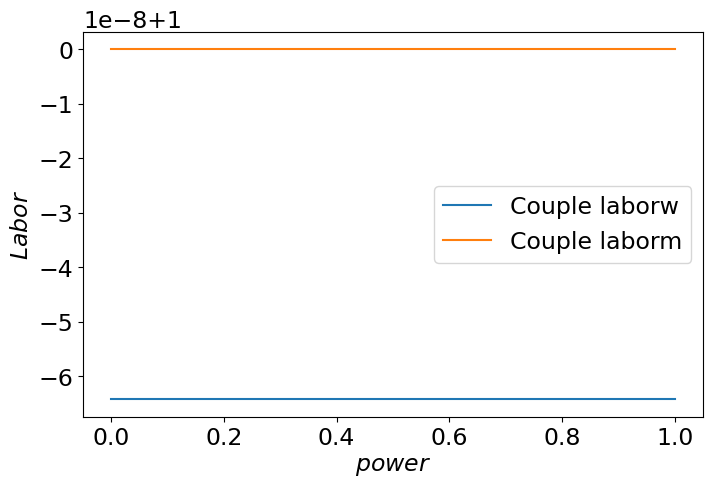

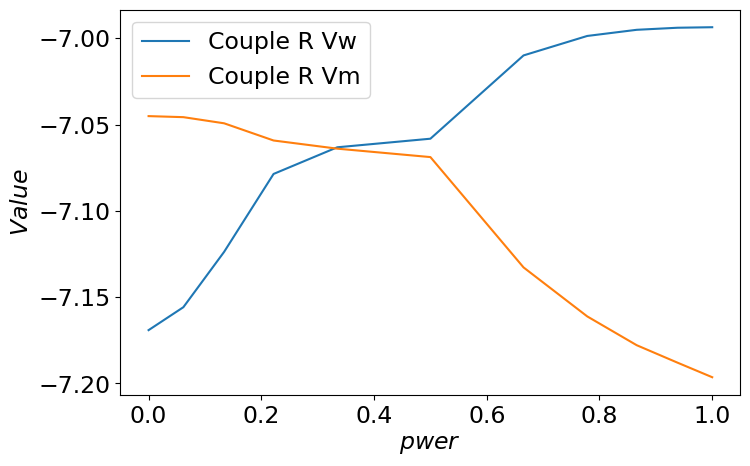

-8.904715533191293
-8.300644250891455


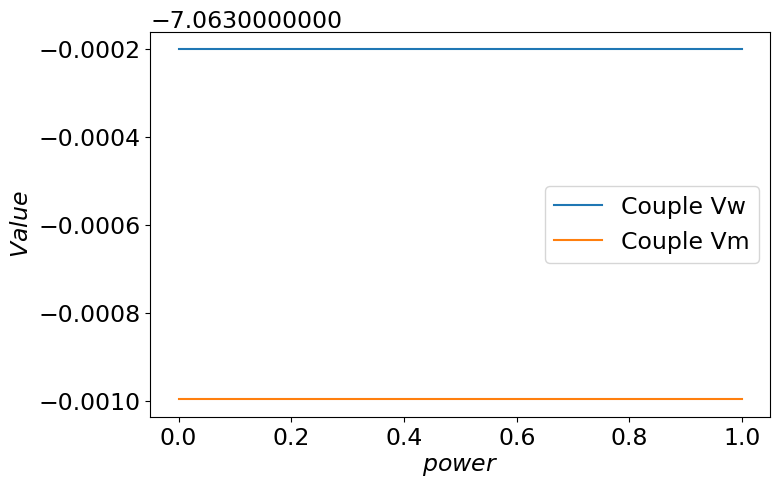

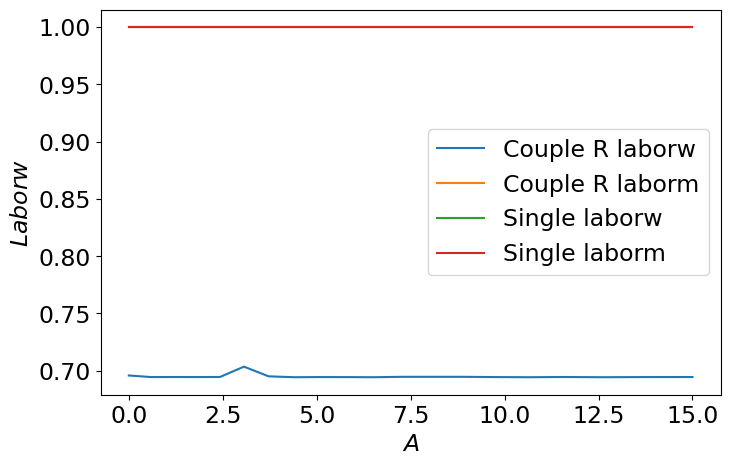

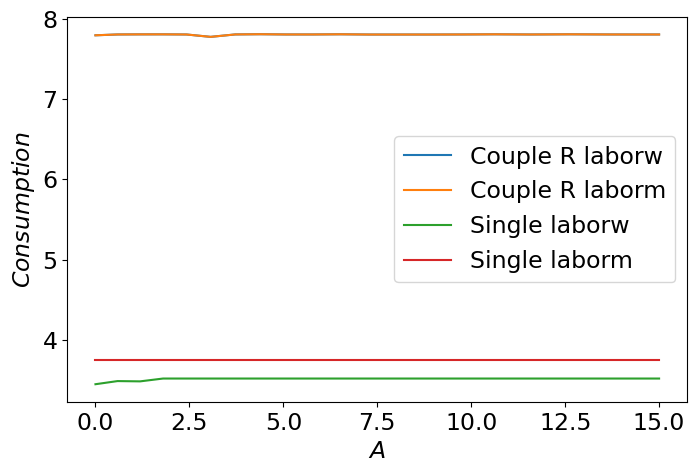

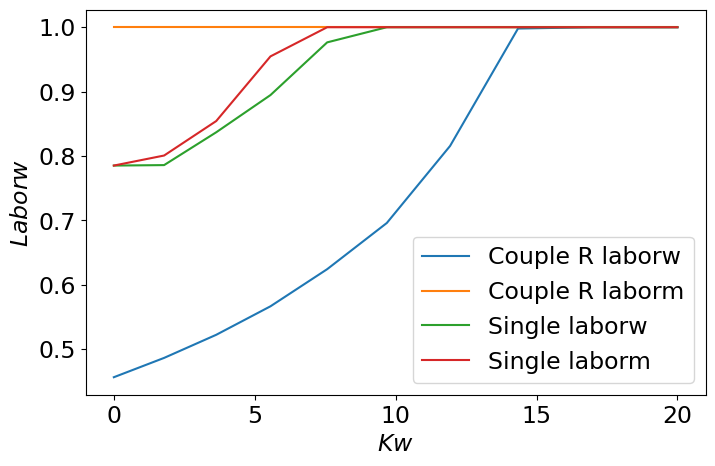

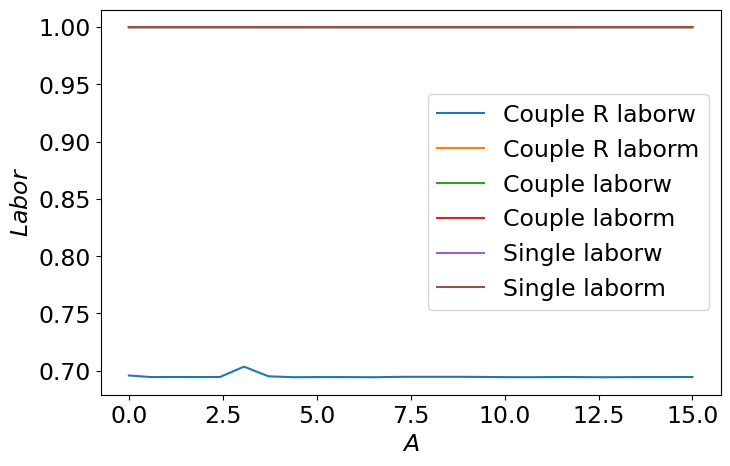

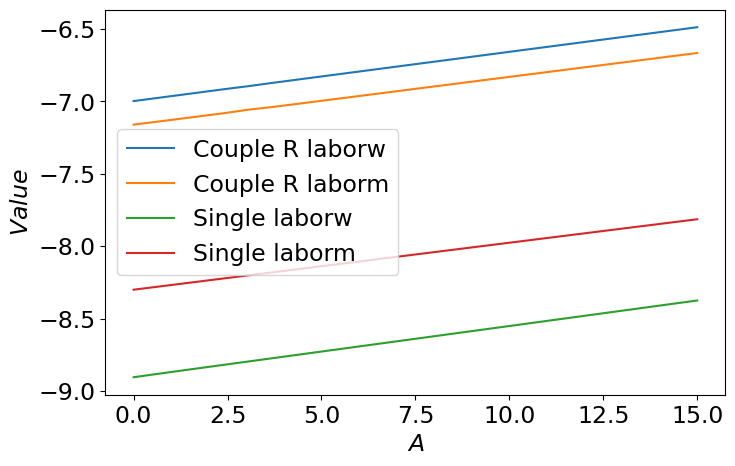

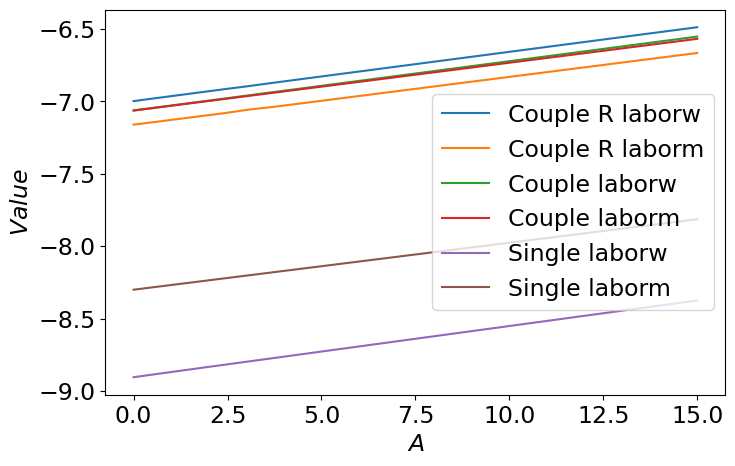

In [ ]:
i_P = 7
#DENNE BETYDER NOGET, ved 5 så ser kvinder underlige ud, den burde ikke betyde noget
#i_P = 8
i_A = 0
i_L = 5
i_t = 0
i_HKw = 5
i_HKm = 5
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])



#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model_NC'].sol
par = models['model_NC'].par
print(par.grid_love[i_L])
print(par.grid_power[i_P])
print(par.grid_K[i_HKw])
print(par.grid_K[i_HKm])

print(sol.labor_m_couple[t,:,i_L,i_A,i_HKw,i_HKm])
print(sol.labor_w_couple[t,:,i_L,i_A,i_HKw,i_HKm])


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.labor_w_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_power,sol.labor_m_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple laborm')
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R Vw')
ax.plot(par.grid_power,sol.Vm_remain_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple R Vm')
ax.set_xlabel(f"$pwer$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()

print(sol.Vw_single[t,i_A,i_HKw])
print(sol.Vm_single[t,i_A,i_HKm])
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol.Vw_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vw')
ax.plot(par.grid_power,sol.Vm_couple[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Couple Vm')                   
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.cons_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.cons_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.cons_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.cons_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Consumption$")
plt.legend()
plt.show()




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_K,sol.labor_m_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_K,sol.labor_w_single[t,i_A,:], label = 'Single laborw')
ax.plot(par.grid_K,sol.labor_m_single[t,i_A,:], label = 'Single laborm')                      
ax.set_xlabel(f"$Kw$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.Vm_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()







# Estimate the model

In [ ]:
#Save the data 
model = models['model NC, NO_HK ']
model.sim.init_love[:] =0.1
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data1 = Estimate.create_data_new(model,start_p = 9, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK4')


In [ ]:
#Save the data 
#model = models['model LC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_NO_HK2')


model = models['model LC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_LC_HK')

#model = models['model NC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_NO_HK2')


model = models['model NC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_NC_HK')

#Save the data 
#model = models['model FC, NO_HK ']
#model.sim.init_love[:] =0.1
#model.sim.init_A[:] = 6.0
#np.random.seed(model.par.seed)
#data1 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_NO_HK2')


model = models['model FC, HK ']
model.sim.init_love[:] =0.3
model.sim.init_A[:] = 6.0
np.random.seed(model.par.seed)
data2 = Estimate.create_data_new(model,start_p = 2, end_p = 19, to_xl = True, name_xl = 'simulated_data_FC_HK')


In [ ]:

#Estimate the model one time
data_reg = Estimate.aux_est(data2,print_reg=True)
data_reg, Wald_FC, Wald_NC = Estimate.main_est(data_reg,print_reg=True) 